In [29]:
import os
import glob
import re
import pandas
import pandas as pd
import pandas as DataFrame
import csv
import jieba
import jieba.posseg as pseg

import sklearn
import sklearn.feature_extraction.text
import sklearn.pipeline
import sklearn.preprocessing
import sklearn.datasets
import sklearn.cluster
import sklearn.decomposition
import sklearn.metrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

import gensim#For topic modeling
import numpy as np #for arrays
import matplotlib.pyplot as plt #For graphics
import matplotlib.cm #Still for graphics
import seaborn as sns #Makes the graphics look nicer
import scipy

In [68]:
os.chdir("C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data")

In [69]:
extension = 'csv'
all_filenames = [i for i in glob.glob('*.{}'.format(extension))]

In [70]:
#combine all files in the list
combined_csv = pd.concat([pd.read_csv(f) for f in all_filenames ])
#export to csv
combined_csv.to_csv( "C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data/data_combined.csv", index=False)

In [69]:
data = pd.read_csv('C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data/data_combined.csv')
data.shape

(22031, 10)

In [70]:
data

Posts      User Names  \
0      :女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...           小黑爱小白   
1      :《恋爱前规则》这部电影拍得一点也不像原著《和空姐同居的日子》那么精彩，这些网络小说改编成电...       肉包儿和猪猪的纪念   
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
3             :看了恋爱前规则，对小说产生了兴趣，《和空姐同居的日子》找出来看，刚刚看完，无限yy           成熟孩子气   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
5                                       :@thales 提倡合法同居。            阿力克狮   
6                 :@thales 你就忍心人家下半辈子活在坟墓之中？撕掉本本，还可以同居嘛。            阿力克狮   
7      :(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...          i幸福i晓林   
8      :只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...            Z新新Z   
9      :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...           橘子Dan   
10     :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...            飞天凡草   
11     :我的一个异性网友，也是老乡，通过网络认识了一个男青年，两人很快坠入爱河并同居，之后该男子以...             胡芳波   
12             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
13     :〖感情运〗决定让某个人进驻自己生命。可能在今年「决定让另一个人走进生命里」，也许是同居而不...            陈小能能   
14               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
15     :今天无意中听见了网友说电视剧《和空姐同居的日子》 ，我很高兴，但他们叹了叹说是姚晨主演冉静...           神无月琉璃   
16                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
17     :知道周迅的越来越多，知道鲁迅的越来越少/ 知道马赛克的越来越多，知道马克思的越来越少/ 知...             银子黄   
18                           :问一个让大家喷饭的问题，“非法同居”到底是什么概念？           非的清醒纪   
19     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
20     :如今知道周迅的越来越多，知道鲁迅的越来越少；知道比尔的越来越多，知道保尔的越来越少；肚子大...            浩董HD   
21     :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...            小白有菜   
22     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
23         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
24     :华中农业大学一个赵姓女同学原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三人相商，...             老霍V   
25     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
26       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
27     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
28     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
29                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
...                                                  ...             ...   
22001                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
22002                                         :想和成熟的女性同居             亖w亖   
22003                                     :#同居后最容易闹矛盾的点#            割白菜的   
22004  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
22005                :#恒翁_摄氏度[超话]#\n这是什么甜蜜小日常\n同居实锤！！！！！      江户川ccccccc   
22006          :恋爱3年不同居的肯定分手,同居3年的不结婚肯定分手,结婚3年没吵过架的肯定离婚。    用户7308752023   
22007                                     :偷男说的不就是我们彭云飞吗             栗小兎   
22008  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
22009  :猫传染性腹膜炎是感染猫冠状病毒而引起的疾病，传染率非常高。一般认为是经口鼻感染。病毒携带猫...            大菊很重   
22010  :心情打结的时候就听首舒心的歌\n接下来想组织一下蹩脚的语言记录我的同居“差友”\n[人人公...         网上冲浪中er   
22011  :#peewee日常##peewee近期的精神文明建设#\n北京最喜欢的季节\n和我卷妹同居...          Peewee   
22012  :63\n阿a和b先生同居了，b先生将东西都搬到了阿a的家里。\n“幸好这里有两个房间。”阿...             咕墨墨   
22013                             :照片太多不知从何发起\n和我多姐的同居生活        一个叫做冷的少女   
22014        :发布了头条文章：《婚姻手记之婚前同居篇》 您身边的私人法律顾问 婚姻手记之婚前同居篇           律法人生1   
22015  :#同居后最容易闹矛盾的点##情侣#生活中的柴米油盐吧！彼此会更在意一些小细节 情侣同居后容...           可可壁纸集   
22016  :#博君一肖[超话]#\n\n成年赞赞和幼年啵啵的同居生活。。。。。。。。\n\n（拿图吱 ...  壳里瞎摸CurlySharm   
22017  :#帝韦伯# #帝二世# #埃尔梅罗二世# #fgo# 韦伯／二世生贺。本来是要10月3号发...              绿绳   
22018                                         :与我同居真的太幸福             徐九九   
22019               :9.30，我家牛牛和花花同学荣获国家一级证书一本，合法同居，持证上岗。        苏雅丹s2y5d   
22020                     :【张云龙李凯馨我的波塞冬】撸猫男叶海！安菲拒绝“同居”~~        布莱尔A_245   
22021  :未来的一个周\n要迎来盼了很久的约会\n迎来他的生日\n迎来我们的同居 幸福的生活在向我们...      fawn__wang   
22022  :氦!以后谁跟我同居简直就是有福

In [71]:
#文本清理Text Cleaning
#单独记录出现的书籍电影或者电视剧，以及hashtags
#Separately record movies/books/ TV shows, as well as hashtags
posts = data['Posts']
posts_clean = []
movies = []
hashtags = []

for post in posts:
    #http, @, \n
    post = re.sub(r'http.+', '', post)
    post = re.sub(r'\@.+','', post)
    post = re.sub(r'\n', '', post)
    
    #In Chinese 《》 is used for book, TV or movie names
    movie = re.findall(r'《\w+》',post)
    movies.append(movie)
    
    #In Chinese, double hashtags are used instead of one
    #有一些连续好几个#的比较烦
    #some posts have multiple hashtags which are annoying
    hashtag = re.findall(r'#(.*?)#',post)
    hashtags.append(hashtag)
    
    posts_clean.append(post)

In [72]:
#检查一下 Double check
print(len(posts))
print(len(posts_clean))
print(len(movies))
print(len(hashtags))

22031
22031
22031
22031


In [73]:
#有一些使用单#的,并没有多少，我们忽略掉
#some posts use singel hashtags but not a lot，just ignore them

number_of_single_hashtags = 0
for post in posts_clean:
    if '#' in post:
        number_of_single_hashtags += 1
        
number_of_single_hashtags

3124

In [74]:
movies[-5:]

[['《流淌的美好时光》', '《流淌的美好时光》'], [], [], ['《超时空同居》'], []]

In [109]:
#label those who mention movies as movie
#first let's see how many of those posts are related to media arts
n = 0
for movie in movies:
    if len(movie) != 0:
        n += 1
print(n)

#roughly 10% mention movie or books or TV shows

1943


In [75]:
hashtags[-5:]

[[],
 ['警察[超话]', '最美基层民警', '北京[超话]'],
 ['北京[超话]', '北京[超话]', '最美基层民警', '北京[超话]'],
 [],
 []]

In [110]:
n = 0
for tag in hashtags:
    if len(tag) != 0:
        n += 1
print(n)

#roughly 15% have hashtags

3091


In [76]:
#有一些hashtag里面有[]可以考虑把内容拉出来，不过暂时不动
for hashtag in hashtags:
    for tag in hashtag:
        if '[' in tag:
            print(tag)

因为遇见你[音乐]
青春之旅 真人版[电影]
Popular Song (Feat. MIKA)[音乐]
狼少女与黑王子[电影]
爵迹[电影]
一句顶一万句[电影]
和空姐分居的日子（和空姐同居的日子续）-文猪[图书]
동거 (同居)[音乐]
到不了-陈翔[音乐]
临时同居[电影]
女主角失格[电影]
破分手传闻】杜海涛沈梦辰恋情曝光后，屡传分手，更有传女方出轨。今日，某星探曝光两人同居视频，沈梦辰现身杜海涛家中。[心]
美国队长3[电影]
从你的全世界路过-张嘉佳[图书]
陪安东尼度过漫长岁月[电影]
荒唐-疯子三三[图书]
我们大家的河合庄[电影]
从此以后（电影《夏有乔木雅望天堂》主题曲）[音乐]
海洋之歌-西瓜_JUN[音乐]
一个人-韩若彤[音乐]
追凶者也[电影]
和自己旅行[音乐]
My Own Life-周笔畅[音乐]
逗鸟外传：萌宝满天飞[电影]
大话西游3[电影]
你在终点等我[音乐]
爱两只不同居居的王琳和马婉悦[超话]
Awaken-F[超话]
彩蛇[超话]
杨超越[超话]
杨超越[超话]
尹均相[超话]
金裕贞[超话]
李泽言[超话]
贺顶红[超话]
林彦俊[超话]
二次元[超话]
jonyj[超话]
oner[超话]
漠尚[超话]
幕后之王[超话]
罗晋[超话]
mrshiddleston[超话]
漠尚[超话]
合法同居[超话]
与紫成说[超话]
博君一肖[超话]
权瞳[超话]
胖次鱼资源基地[超话]
轰爆[超话]
明日之后[超话]
阎王不高兴[超话]
陳家樂Carlos[超话]
丁醇少女101[超话]
明日之后[超话]
夫夫同居日常[超话]
小说推荐[超话]
夫夫同居日常[超话]
明日之后[超话]
圣经经文[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
佐仓绫音[超话]
坛虾[超话]
泰剧与爱同居[超话]
灿白[超话]
灿白文[超话]
灿白文推荐[超话]
贺顶红[超话]
迪婷[超话]
许魏洲[超话]
泰剧与爱同居[超话]
王者荣耀九天狐[超话]
小说漫画推荐[超话]
情感[超话]
泰剧与爱同居[超话]
喜翻译制组[超话]
泰剧与爱同居[超话]
许魏洲[超话]
九瓶[超话]
泰剧与爱同居[超话]
泰剧与爱同居[超话]
泰剧与爱同居[超话]
泰剧与爱同居[超话]
喜翻译制组[超话]
泰剧与爱同居

In [77]:
#结巴中文分词
#segmentation using jieba

def chinese_word_cut(text):
    return " ".join(jieba.cut(text))

data['Clean Posts'] = posts_clean
data['Cutted_Posts'] = data['Clean Posts'].apply(chinese_word_cut)

In [114]:
#去掉重复的
#drop duplicates
data = data.drop_duplicates(subset="Clean Posts", keep="first")
data.shape

In [115]:
data.shape

(18345, 14)

In [ ]:
#turn dates into years
Year = []
for year in data['Post Date']:
    Year.append(year[:4])
    
data['Year'] = Year

In [15]:
#data['Cutted_Posts'] = data.pop('Cutted Posts')

In [79]:
data.Cutted_Posts[:5]

0    : 女人 失恋 以后 ， 听到 大家 都 普遍 反映 前男友 新 找 的 那个 姑娘 没 自...
1    : 《 恋爱 前 规则 》 这部 电影 拍 得 一点 也 不 像 原著 《 和空姐 同居 的...
2    : 不论 东西 多少 ， 只要 是 搬家 都 是 大 工程 啊 。 我 跟 同居 者 聊天 ...
3    : 看 了 恋爱 前 规则 ， 对 小说 产生 了 兴趣 ， 《 和空姐 同居 的 日子 》...
4                                                    :
Name: Cutted_Posts, dtype: object

# Let's try  clustering for unsupervised

In [117]:
max_df = 0.8
min_df = 3
vecttfidf = TfidfVectorizer(max_df = max_df, 
                       min_df = min_df, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b')
term_matrix_tf = pd.DataFrame(vecttfidf.fit_transform(data.Cutted_Posts).toarray(), columns=vecttfidf.get_feature_names())
term_matrix_tf.head()

__   aa  aa制   ab  abo   ac  acfun  adele  akb48  alex  ...   鼻涕   鼻血  \
0  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  ...  0.0  0.0   

    鼾声  齐心协力  齐齐哈尔  龙卷风   龙哥   龙年   龙虾   龙门  
0  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
1  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
2  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
3  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  
4  0.0   0.0   0.0  0.0  0.0  0.0  0.0  0.0  

[5 rows x 14664 columns]

In [118]:
#k-means
#lets just try 10 categoris
#分十类试一试

km = sklearn.cluster.KMeans(n_clusters=10, init='k-means++')
km.fit(term_matrix_tf)
data['kmeans_predictions'] = km.labels_
data

C:\Users\65697\Anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Posts      User Names  \
0      :女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...           小黑爱小白   
1      :《恋爱前规则》这部电影拍得一点也不像原著《和空姐同居的日子》那么精彩，这些网络小说改编成电...       肉包儿和猪猪的纪念   
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
3             :看了恋爱前规则，对小说产生了兴趣，《和空姐同居的日子》找出来看，刚刚看完，无限yy           成熟孩子气   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
7      :(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...          i幸福i晓林   
8      :只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...            Z新新Z   
9      :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...           橘子Dan   
10     :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...            飞天凡草   
11     :我的一个异性网友，也是老乡，通过网络认识了一个男青年，两人很快坠入爱河并同居，之后该男子以...             胡芳波   
12             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
13     :〖感情运〗决定让某个人进驻自己生命。可能在今年「决定让另一个人走进生命里」，也许是同居而不...            陈小能能   
14               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
15     :今天无意中听见了网友说电视剧《和空姐同居的日子》 ，我很高兴，但他们叹了叹说是姚晨主演冉静...           神无月琉璃   
16                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
17     :知道周迅的越来越多，知道鲁迅的越来越少/ 知道马赛克的越来越多，知道马克思的越来越少/ 知...             银子黄   
18                           :问一个让大家喷饭的问题，“非法同居”到底是什么概念？           非的清醒纪   
19     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
20     :如今知道周迅的越来越多，知道鲁迅的越来越少；知道比尔的越来越多，知道保尔的越来越少；肚子大...            浩董HD   
21     :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...            小白有菜   
22     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
23         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
24     :华中农业大学一个赵姓女同学原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三人相商，...             老霍V   
25     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
26       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
27     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
28     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
29                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
30     :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发...           文侠罗竖一   
31     :DVD剧情片《血之芬芳》，播放：http://sinaurl.cn/haSTn ，海报：h...       dvdkankan   
...                                                  ...             ...   
21999     :等我毕业了我要写本书 书名就叫如何在精神病舍友的压迫下搞科研 或者叫与三百万债主的同居生活        敲代码的石原里美   
22000  :感情这种东西真的很奇怪，一会爱的要死一会又恨的要死。我想一份感情里最重要的是两个人一起用心...             塔茜咖   
22001                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
22002                                         :想和成熟的女性同居             亖w亖   
22003                                     :#同居后最容易闹矛盾的点#            割白菜的   
22004  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
22005                :#恒翁_摄氏度[超话]#\n这是什么甜蜜小日常\n同居实锤！！！！！      江户川ccccccc   
22007                                     :偷男说的不就是我们彭云飞吗             栗小兎   
22008  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
22009  :猫传染性腹膜炎是感染猫冠状病毒而引起的疾病，传染率非常高。一般认为是经口鼻感染。病毒携带猫...            大菊很重   
22010  :心情打结的时候就听首舒心的歌\n接下来想组织一下蹩脚的语言记录我的同居“差友”\n[人人公...         网上冲浪中er   
22011  :#peewee日常##peewee近期的精神文明建设#\n北京最喜欢的季节\n和我卷妹同居...          Peewee   
22012  :63\n阿a和b先生同居了，b先生将东西都搬到了阿a的家里。\n“幸好这里有两个房间。”阿...             咕墨墨   
22013                             :照片太多不知从何发起\n和我多姐的同居生活        一个叫做冷的少女   
22014        :发布了头条文章：《婚姻手记之婚前同居篇》 您身边的私人法律顾问 婚姻手记之婚前同居篇           律法人生1   
22015  :#同居后最容易闹矛盾的点##情侣#生活中的柴米油盐吧！彼此会更在意一些小细节 情侣同居后容...           可可壁纸集   
22016  :#博君一肖[超话]#\n\n成年赞赞和幼年啵啵的同居生活。。。。。。。。\n\n（拿图吱 ...  壳里瞎摸CurlySharm   
22017  :#帝韦伯# #帝二世# #埃尔梅罗二世# #fgo# 韦伯／二世生贺。本来是要10月3号发...              绿绳   
22018                                         :与我同居真的太幸福             徐九九   
22019               :9.30，我家牛牛和花花同学荣获国家一级证书一本，合法同居，持证上岗。        苏雅丹s2y5d   
22020                     :【张云龙李凯馨我的波塞冬】撸猫男叶海！安菲拒绝“同居”~~        布莱尔A_245   
22021  :未来的一个周\n要迎来盼了很久

In [122]:
#save
data.to_csv(r'data/Cleaned Data with kmeans labels', index = False, header=True)

In [20]:
def plotSilhouette(n_clusters, X):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize = (15,5))
    
    ax1.set_xlim([-0.1, 1])
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])
    clusterer = sklearn.cluster.KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)
    
    silhouette_avg = sklearn.metrics.silhouette_score(X, cluster_labels)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = sklearn.metrics.silhouette_samples(X, cluster_labels)

    y_lower = 10
    
    for i in range(n_clusters):
        ith_cluster_silhouette_values = sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i
        cmap = matplotlib.cm.get_cmap("nipy_spectral")
        color = cmap(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        y_lower = y_upper + 10
    
    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    cmap = matplotlib.cm.get_cmap("nipy_spectral")
    colors = cmap(float(i) / n_clusters)
    ax2.scatter(reduced_data[:, 0], reduced_data[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    projected_centers = pca.transform(centers)
    # Draw white circles at cluster centers
    ax2.scatter(projected_centers[:, 0], projected_centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(projected_centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("PC 1")
    ax2.set_ylabel("PC 2")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')
    plt.show()
    print("For n_clusters = {}, The average silhouette_score is : {:.3f}".format(n_clusters, silhouette_avg))

In [119]:
PCA = sklearn.decomposition.PCA
pca = PCA(n_components = 2).fit(term_matrix_tf)
reduced_data = pca.transform(term_matrix_tf)

'c' argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with 'x' & 'y'.  Please use a 2-D array with a single row if you really want to specify the same RGB or RGBA value for all points.


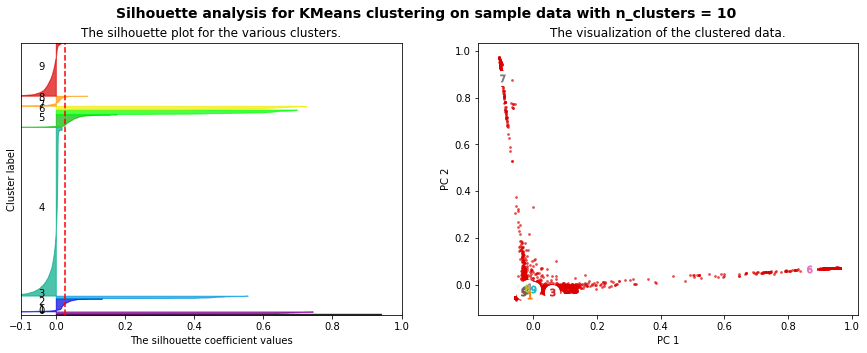

For n_clusters = 10, The average silhouette_score is : 0.027


In [120]:
X = term_matrix_tf
plotSilhouette(10, X)

In [216]:
topic_count = dict(Counter(data['kmeans_predictions']))
topic=[]
count=[]
for k, v in sorted(topic_count.items(), key=lambda item: item[0]):
        topic.append(k)
        count.append(v)
topic_count = {}
topic_count['Cluster'] = topic
topic_count['Count'] = count
topic_count = pd.DataFrame(topic_count)
topic_count.T

0      1    2    3    4    5    6     7    8    9
Cluster    0      1    2    3    4    5    6     7    8    9
Count    496  10853  160  244  300  864  933  4219  146  130

silhouette_score is ok with 0.027. But Category 1 takes up 10000/22000, roughly half of my data which is not ideal...It might be too general.But still let's take a look at them.

In [128]:
terms = vecttfidf.get_feature_names()
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
for i in range(10):
    print("Cluster %d:" % i)
    for ind in order_centroids[i, :10]:
        print(' %s' % terms[ind])
    print('\n')

Top terms per cluster:
Cluster 0:
 超话
 泰剧
 之后
 离婚
 长干里
 两小无嫌
 青梅
 老婆
 马来
 绕床


Cluster 1:
 女友
 男友
 今天
 视频
 婚前
 分享
 大学生
 时尚
 什么
 同居人


Cluster 2:
 无表情
 厌倦
 突然
 坐在
 沙发
 下班
 开口
 回家
 愣愣
 我们


Cluster 3:
 越来越少
 越来越
 婚后
 未婚同居
 耍手艺
 二奶
 耍手腕
 奶奶
 出书
 读书


Cluster 4:
 一样
 结婚
 动物
 大人
 有钱
 夫人
 女人
 情人
 小孩
 男人


Cluster 5:
 日子
 和空姐
 小说
 电视剧
 空姐
 姚晨
 喜欢
 冉静
 好看
 第二部


Cluster 6:
 生活
 开始
 结束
 我们
 正式
 开启
 今天
 美好
 终于
 幸福


Cluster 7:
 我们
 一个
 一起
 结婚
 自己
 没有
 现在
 女人
 真的
 不是


Cluster 8:
 就是
 便是
 升值
 劳工
 痛聚
 难人
 誓言
 渔网
 升职
 离乡


Cluster 9:
 青春
 不要
 千万
 结婚
 爱情
 女孩
 辽阔
 一个
 维持
 致敬




Cat5 is about an online romantic novel "cohabitation with an air attendant", and an actress with her TV show

Let's take a look the rest

In [217]:
Cat0 = []
Cat0 = data.loc[data['kmeans_predictions'] == 0].iloc[:,10]
Cat0

172              :小鸟恋爱了，蚂蚁同居了，蝴蝶结婚了，毛毛虫改嫁了，青蛙也生孩子了，我还在等什么？
480                                               :竟然甘快就同居
501                               :青梅依旧,云淡风轻. 同居长干里，两小无嫌猜.
690      :11月1日，小光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，毛毛虫再婚了，青蛙也生蝌蚪了...
739      :忘了算了。为什么我们还要重逢呢？搞笑。为什么偏偏是你，你偏偏是那个人呢！郎骑竹马来，绕床弄...
741               :说说#喜欢却不能在一起的人#？郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜。
742      :光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚了，毛毛虫改嫁了，青蛙...
745      :光棍节快到了，★★★小鸟恋爱了★★★★★★蚂蚁同居了★★★★★★苍蝇怀孕了★★★★★★蚊子...
748                     :郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜。――李白《长干行》
754      :光棍节快到了， 光棍节快到了，～～～小鸟恋爱了～～～～蚂蚁同居了～～～苍蝇怀孕了～～～蚊子...
773                        :郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜——很美的诗句
785      :[管不着爱] [爱] 光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚...
787      :11月11日，又是#光棍节#啦，你目前还是单身吗，还想继续单身下去咩，有没有想过找一个，男...
790      :光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚了，毛毛虫改嫁了，青蛙...
791      :[1/4]1.你是我的全部你知道不？你是我的最爱你知道不？你是我生命的支柱你知道不？你是我...
797      :#光棍节~脱光#光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚了，毛...
798      :oО-→清秀光棍节快到了，★★★小鸟恋爱了★★★★★★蚂蚁同居了★★★★★★苍蝇怀孕了★★.

In [256]:
n = 0
for a in Cat0:
    if '青梅' in a :
        n += 1
n

124

In [257]:
n = 0
for a in Cat0:
    if '与爱' in a :
        n += 1
n

126

In [253]:
a = Cat0.tolist()
a

[':小鸟恋爱了，蚂蚁同居了，蝴蝶结婚了，毛毛虫改嫁了，青蛙也生孩子了，我还在等什么？',
 ':竟然甘快就同居',
 ':青梅依旧,云淡风轻. 同居长干里，两小无嫌猜.',
 ':11月1日，小光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，毛毛虫再婚了，青蛙也生蝌蚪了，你准备做点什么呢？祝小光棍们发奋图强！吼吼！',
 ':忘了算了。为什么我们还要重逢呢？搞笑。为什么偏偏是你，你偏偏是那个人呢！郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜。',
 ':说说#喜欢却不能在一起的人#？郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜。',
 ':光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚了，毛毛虫改嫁了，青蛙也生孩子了，你还等什么？ -华人搞笑第一站 ',
 ':光棍节快到了，★★★小鸟恋爱了★★★★★★蚂蚁同居了★★★★★★苍蝇怀孕了★★★★★★蚊子流产了★★★★★★蝴蝶离婚了★★★★★★毛毛虫改嫁了★★★★★★青蛙也生孩子了★★★★★★你还等什么？★★★……',
 ':郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜。――李白《长干行》',
 ':光棍节快到了， 光棍节快到了，～～～小鸟恋爱了～～～～蚂蚁同居了～～～苍蝇怀孕了～～～蚊子流产了～～～蝴蝶离婚了～～～毛毛虫改嫁了～～～青蛙也生孩子了～～～你还等什么？',
 ':郎骑竹马来，绕床弄青梅。同居长干里，两小无嫌猜——很美的诗句',
 ':[管不着爱] [爱] 光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚了，毛毛虫改嫁了，青蛙也生孩子了，你还等神马？',
 ':11月11日，又是#光棍节#啦，你目前还是单身吗，还想继续单身下去咩，有没有想过找一个，男/女朋友来轰轰烈烈，的爱一生呢 小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产蝴蝶离婚了，毛毛虫改嫁了，青蛙也生孩子了，你还等什么？？？？？？？？？？（转自猫扑）',
 ':光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕了，蚊子流产了，蝴蝶离婚了，毛毛虫改嫁了，青蛙也生蝌蚪了，你准备做点什么呢？祝光棍节发奋图强！',
 ':[1/4]1.你是我的全部你知道不？你是我的最爱你知道不？你是我生命的支柱你知道不？你是我活着的理由你知道不？我发错了你知道不？(字数:57)[发送]2.光棍节到了，小鸟恋爱了，蚂蚁同居了，苍蝇怀孕

Cat0 is about romantic love. But it's heavily copy-pasted. One is about a traditional poem that mentioned friendship formed in early childhood , friendship but a little bit more than friendship. Another content is about Nov.11th which is called bare-branch bachelor day in China. Because it is 11.11, being single all the way. The rest is also about romantic love.

In [132]:
Cat1 = []
Cat1 = data.loc[data['kmeans_predictions'] == 1].iloc[:,0]
Cat1

2        :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...
4                                      :@claireg 同居也是一种选择。
9        :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...
10       :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...
12               :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。
14                 :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi
16                           :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？
19       :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...
21       :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...
22       :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...
23           :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？
25       :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...
26         :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌
27       :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...
28       :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...
29                   :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB
30       :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发.

1 is too general with half of my posts.

In [133]:
Cat2 = []
Cat2 = data.loc[data['kmeans_predictions'] == 2].iloc[:,0]
Cat2

6446     :她下班回家,他坐在沙发上,面无表情的抽着烟,突然他开口了:喂,我说,我们像这样同居了两年了...
6484     :她下班回家,他坐在沙发上,面无表情的抽着烟,突然他开口了:喂,我说,我们像这样同居了两年了...
6652     :她下班回家.他坐在沙发上.面无表情的抽着烟.突然他开口了:"喂.我说.我们像这样同居了两年...
6819     :.面无表情地抽着烟，突然他开口了：“喂，我说，我们像这样同居两年了，你不觉得厌倦吗?” 她...
7489     :微小说~她下班回家.他坐在沙发上.面无表情的抽着烟.突然他开口了:"喂.我说.我们像这样同...
7622     :她下班回家,他坐在沙发上,面无表情的抽着烟,突然他开口了:喂,我说,我们像这样同居了两年了...
7648     : 吓坏了吧 面无表情地抽着烟，突然他开口了：“喂，我说，我们像这样同居两年了，你不觉得厌倦...
7668     :面无表情地抽着烟，突然他开口了：“喂，我说，我们像这样同居两年了，你不觉得厌倦吗?”她停下...
7754     :她下班回家。他坐在沙发上。面无表情地抽着烟，突然他开口了：喂，我说，我们像这样同居两年了，...
7989     :她下班回家,他坐在沙发上,面无表情的抽着烟,突然他开口了:喂,我说,我们像这样同居了两年了...
8097     :她下班回家,他坐在沙发上,面无表情地抽着烟，突然他开口 了：“喂，我说，我们像这样同居两年...
8207     :她下班回家,他坐在沙发上,面无表情地抽着烟，突然他开口了：“喂，我说，我们像这样同居两年了...
8280     :！她下班回家.他坐在沙发上.面无表情的抽着烟.突然他开口了:"喂.我说.我们像这样同居了两...
8571     :她下班回家，他坐在沙发上，面无表情地抽着烟，突然他开口了:"喂，我说我们像这样同居两年了，...
8794     :＂她下班回家，他坐在沙发上，面无表情地抽着烟，突然他开口了:"喂，我说我们像这样同居两年了...
9027     :她下班回家，他坐在沙发上，面无表情地抽着烟，突然他开口了:"喂，我说我们像这样同居两年了，...
9046     :她下班回家,他坐在沙发上，面无表情地抽着烟.突然开口说:"喂.我们这样同居两年了，你不觉得.

2 is chunks of copy-pasted content. probably from a novel

In [134]:
Cat3 = []
Cat3 = data.loc[data['kmeans_predictions'] == 3].iloc[:,0]
Cat3

7        :(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...
17       :知道周迅的越来越多，知道鲁迅的越来越少/ 知道马赛克的越来越多，知道马克思的越来越少/ 知...
20       :如今知道周迅的越来越多，知道鲁迅的越来越少；知道比尔的越来越多，知道保尔的越来越少；肚子大...
44       :娱乐越来越多，愉快越来越少；食品越来越多，食欲越来越少；同居越来越多，爱情越来越少。有想成...
163            :娱乐越来越多，愉快越来越少；食品越来越多，食欲越来越少；同居越来越多，爱情越来越少。
239      :知道上帝的越来越多，知道老子的越来越少；知道四大天王的越来越多，知道四大发明的越来越少；未...
332      :知道四大天王的越来越多，知道四大发明的越来越少； 未婚同居的越来越多，婚后同居的越来越少；...
352      :这年头，未婚同居的越来越多，婚后同居的越来越少；耍手腕的人越来越多，耍手艺的人越来越少；出...
368      :《社会怪象》未婚同居的越来越多，结婚同居的越来越少；耍手腕的人越来越多，耍手艺的人越来越少...
702      :肚子大的人越来越多，肚量大的人越来越少；未婚同居的越来越多， 婚后同居的越来越少；耍手腕的...
708      :未婚同居的越来越多， 婚后同居的越来越少，耍手腕的人越来越多， 耍手艺的人越来越少，出书的...
722      :知道周迅的越来越多，知道鲁迅的越来越少。知道马克的越来越多，知道马克思的越来越少。知道比尔...
1026     :肚子大的人越来越多，肚量大的人越来越少； 未婚同居的越来越多，婚后同居的越来越少； 耍手腕...
1298     :养二奶的越来越多，养奶奶的越来越少；出书的人越来越多，读书的人越来越少；耍手腕的人越来越多...
1308     :养二奶的越来越多，养奶奶的越来越少；出书的人越来越多，读书的人越来越少；耍手腕的人越来越多...
1313     :养二奶的越来越多，养奶奶的越来越少；出书的人越来越多，读书的人越来越少；耍手腕的人越来越多...
1314     :养二奶的越来越多，养奶奶的越来越少；出书的人越来越多，读书的人越来越少；耍手腕的人越来越多.

Cat3  is full of copy-pasted content. They are not reblogged but copy-pasted. It's lamenting about how social norms and traditional values are cracking down."(nowadays,) more and more unmarried cohabitation, less and less married cohabitation"

In [135]:
Cat4 = []
Cat4 = data.loc[data['kmeans_predictions'] == 4].iloc[:,0]
Cat4

370      :【社会乱象】没结婚的像结婚的一样同居，结婚的像没结婚的一样分居；动物像人一样穿衣服，人像动...
463      :《现代社会新特征》◆没结婚的跟结了婚的一样同居, 结了婚的跟没结婚的一样分居。◆没钱的像有...
477      :这社会到底怎么了 结了婚的跟没有结婚的一样分居 没有结婚的跟结了婚的一样同居 穷人像富人一...
623      :社会新特征：没结婚的跟结婚的一样同居；结了婚的跟没结婚的一样分居。没有钱的像有钱人一样装富...
645      :【社会乱象】:没结婚的像结婚的一样同居，结婚的像没结婚的一样分居；动物像人一样穿衣服，人像...
801      :社会乱象总结： 没结婚的像结婚的一样同居，结婚的像没结婚的一样分居； 动物像人一样穿衣服，...
802      :(1/2)【记者观察之社会乱象：新华社杜老师】没结婚的像结婚的一样同居，结婚的像没结婚的一...
809      :没结婚的像结婚的一样同居，结婚的像没结婚的一样分居；动物像人一样穿衣服，人像动物一样露着肉...
889      :社会乱象:没结婚的像结婚的一样同居，结婚的像没结婚的一样分居；动物像人一样穿衣服，人像动物...
910      :【社会乱象】●没结婚的像结婚的一样同居,结婚的像没结婚的一样分居●动物像人一样穿衣服,人像...
1472     :#微博派福#没结婚的像结了婚一样同居，结了婚的像没结婚一样分居 http://sinaur...
1640     :现代社会的四个一样： 1没结婚的跟结了婚的一样同居；结了婚的跟没结婚的一样分居。2没有钱的...
4807     :(短信精编)错位现象：没结婚像结婚一样同居，结婚像没结婚一样分居。小孩跟大人一样成熟，大人...
4913     :【社会新特征】◆没结婚的跟结了婚的一样同居, 结了婚的跟没结婚的一样分居。◆没有钱的像有钱...
4914     :(1/2)当今社会百态: 1.没结婚的跟结了婚的一样同居,结了婚的跟没结婚的一样分居。 2...
4930     :】◆没结婚的跟结了婚的一样同居, 结了婚的跟没结婚的一样分居。◆没有钱的像有钱人一样装富；...
4934     :【社会新特征】◆没结婚的跟结了婚的一样同居, 结了婚的跟没结婚的一样分居。◆没有钱的像有钱.

Cat4 are copy-pasted contents.Traditional values lamenting new values.

In [136]:
Cat5 = []
Cat5 = data.loc[data['kmeans_predictions'] == 5].iloc[:,0]
Cat5

1        :《恋爱前规则》这部电影拍得一点也不像原著《和空姐同居的日子》那么精彩，这些网络小说改编成电...
3               :看了恋爱前规则，对小说产生了兴趣，《和空姐同居的日子》找出来看，刚刚看完，无限yy
15       :今天无意中听见了网友说电视剧《和空姐同居的日子》 ，我很高兴，但他们叹了叹说是姚晨主演冉静...
41       :我认为《与空姐同居的日子》中的冉静还应该是@王珞丹 主演比较合适，她有那种气质，谁知道竟然...
54       :终于跟Jennifer和Michelle联系上了，怀念跟他俩同居的日子啊！那日子一去不复返了……
73       :今天不小心看到《和空姐同居的日子》，貌似很久以前很热的一本书，让我找到了以前看《会有天使替...
105          :好书推荐：纯爱：和空姐同居的日子(续集) http://sinaurl.cn/hI6ob
108      :搞定 挑定了六本：失落的秘符、每天懂一点系列第二三弹、十四堂人生创意课、和空姐同居的日子第一二季
132                     :和空姐同居的日子《恋爱规则》，王珞丹 陈柏霖。 有点点原著的感觉。
136             :看了《和空姐同居的日子》这部小说，让我对一些“事务”的看法发生了很多改变，谢谢你。
160          :好书推荐：上海白领手记：和空姐同居的日子 http://sinaurl.cn/hIkyO
166      :看完《和空姐同居的日子》第一、二部小说和电影《恋爱潜规则》,接着又听完它的广播剧后,开始期...
168                              :最近在酝酿我的长篇小说《和售楼小姐同居的日子》。
259      :刚才没事看了《和空姐同居的日子续》。觉得非常的不好。陆飞冉静的结局太多凄凉了。就像彼岸花，...
298      :看完了小黑很喜欢的据说很纯爱的小说《和空姐同居的日子》，感觉还好，最后挺感人的，但这份爱情...
314          :好书推荐：《白领手记：和空姐同居的日子》 http://sinaurl.cn/hIkyO
330                 :还清晰的记得<和空姐同居的日子>中的感慨:大海啊,全是水;俊马啊,四条

5 is about the novel 'cohabitating with an air attendent'

In [269]:
Cat6 = []
Cat6 = data.loc[data['kmeans_predictions'] == 6].iloc[:,10]
Cat6

49                                      :《实录:离婚后的30天同居生活》 
55       :从现在开始算我的大学生活还有7天，想想三年的大学生活就要结束咯，还真有点不舍得，不舍得我的...
74                  :和竹子的同居生活，KFC，零食摆了一床一桌子，屋里已完全被折腾得没样子了。
88                                    :好 《实录:离婚后的30天同居生活》 
131                    :大家有机会看看《我和一个妓女的同居生活》，这本书真的很不错，很感人。
186                                       :同居的日子让我意识到了婚后生活
273      :高达98.40%的剩女都曾和男友同居生活过，只有1.60%的剩女表示一直跟父母住一起。而3...
278      :上周的时候有聚会，大家再说出门在外的人最喜欢的一个词是“伙伴”。事业上大家共同努力，生活上...
325                                           :开始我和丁丁的同居生活
335      :严苛的生活压力，催生了新一代漂在北京的好男人与好女人：交往没多久，就开始同居，基本上不单人...
337             :与猫小懒同学的同居生活开始，但实质是每天与其斗智斗勇。老妈说：“他越来越聪明了。”
350                  :和蘑菇丰盛的宵夜…电脑传来方力申和邓丽欣的和唱…我们的同居生活极其美好…
352                              :开始三天一个人的生活 谁来帮我同居吧 [挖鼻屎]
378      :1《归来》BY Marshyer HP同人LV/HP。H在不到十一岁的时候穿去前年前被斯莱...
384                                       :開始我的同居生活，我也有室友了
462                               :正式结束了和阿瑞的同居生活，过上了独居的小日子
468                     :天啊！系澳门，师姐无处不在！我就黎同师姐开始同居生活喇喇喇喇喇

In [286]:
n = 0
for a in Cat6:
    if '同居生活' in a :
        n += 1
n

664

In [287]:
n = 0
for a in Cat6:
    if '生活' in a :
        n += 1
n

894

In [292]:
n = 0
for a in Cat7:
    if '继续' in a :
        n += 1
n

90

In [278]:
Cat6.tolist()

[':《实录:离婚后的30天同居生活》 ',
 ':从现在开始算我的大学生活还有7天，想想三年的大学生活就要结束咯，还真有点不舍得，不舍得我的睡了三年的床，不舍得同居三年的室友们，不舍得相处三年的同学们，更舍不得这个不是很好的大学校园。从现在开始用三分钟来想想这些人和物吧···',
 ':和竹子的同居生活，KFC，零食摆了一床一桌子，屋里已完全被折腾得没样子了。',
 ':好 《实录:离婚后的30天同居生活》 ',
 ':大家有机会看看《我和一个妓女的同居生活》，这本书真的很不错，很感人。',
 ':同居的日子让我意识到了婚后生活',
 ':高达98.40%的剩女都曾和男友同居生活过，只有1.60%的剩女表示一直跟父母住一起。而36.77%的剩女曾和3个男友同居生活，其次有27.68%的剩女有过4次同居经历，有过1和2次同居经历的剩女分别为12.98%和14.89%。有过5、6次同居生活的比例分别为4.67%和3.01%。其中那位谈过9次恋爱的剩女已有过8次同居生活。',
 ':上周的时候有聚会，大家再说出门在外的人最喜欢的一个词是“伙伴”。事业上大家共同努力，生活上会想帮助。再生活上独居者，因为他们是最孤独的人群之一，所以他们找来了更多的伙伴来排解孤独。群居生活是一种；同居也属于一种。大家都在找着自己的合群方式让自己像是活在这个世界上必不可少的一个人。',
 ':开始我和丁丁的同居生活',
 ':严苛的生活压力，催生了新一代漂在北京的好男人与好女人：交往没多久，就开始同居，基本上不单人行动，减少除二人约会之外的所有外事活动，下班就回家，家里做饭吃。',
 ':与猫小懒同学的同居生活开始，但实质是每天与其斗智斗勇。老妈说：“他越来越聪明了。”',
 ':和蘑菇丰盛的宵夜…电脑传来方力申和邓丽欣的和唱…我们的同居生活极其美好…',
 ':开始三天一个人的生活 谁来帮我同居吧 [挖鼻屎]',
 ':1《归来》BY Marshyer HP同人LV/HP。H在不到十一岁的时候穿去前年前被斯莱特林家族的巫师收养，就此成为SS，蛇祖本人，在那里生活到二十七岁又回到了穿越前的时间点，作为十一岁的HP继续生活。出于对斯莱特林报恩的心态复活了作为斯莱特林末裔的LV，从此开始长期相杀最终也没彻底相爱的同居日子。',
 ':開始我的同居生活，我也有室友了',
 ':正式结束了和阿瑞的同居

6 is unclear still. But they are in very colloqial tones. Very positive attitudes towards cohabitation with a lot of ! marks, a lot of LOLs. But I cannot identity the topic.

In [260]:
Cat7 = []
Cat7 = data.loc[data['kmeans_predictions'] == 7].iloc[:,10]
Cat7

0        :女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...
6        :只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...
9        :我的一个异性网友，也是老乡，通过网络认识了一个男青年，两人很快坠入爱河并同居，之后该男子以...
11       :〖感情运〗决定让某个人进驻自己生命。可能在今年「决定让另一个人走进生命里」，也许是同居而不...
16                             :问一个让大家喷饭的问题，“非法同居”到底是什么概念？
22       :华中农业大学一个赵姓女同学原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三人相商，...
35       :话说，公司某小孩，已经跟人家同居了。TMD竟然还在我们面前装纯。Don't zhuangb...
36                                            :结婚与同居有什么不同 
45       :午饭时间跟情绪指数偏低的妹妹聊天，说到希望和失望。我知道她刚步入同居生活一定会有这个阶段，...
53       :顺说：想让男人始终重视你，那就别同居，有要求时嘿咻下，嘿咻完了各自过各自的日子，别整天泡一...
60       :看了围脖上火的不得了的后宫优雅，想到与我同学四年的一个新疆女生，也是每天跟别人打电话说自己...
62       :昨天去看望了一个朋友，我都明白，怎么现在还有那么傻的女人。竟然相信并同意协意和丈夫离婚再复...
73       :如果今天去上岛，我们一样能把那些东西吃成快餐。所以，果断的把快餐换成各种各样的零食供同居消...
75       :刚才一个19岁的女孩向我倾诉，说她爱上一个大她10岁的已婚男，并同居了。已婚男称他会离婚娶...
81       :一个赵姓女大学生，原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三人相商，同居一起...
83       :我朋友同居了6年的女朋友，因为我朋友没房，所以就和我朋友的同一个办公室的同事结婚了，现在这...
84       :就当听天方夜谭：一个赵姓女大学生，原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三.

In [267]:
n = 0
for a in Cat7:
    if '结婚' in a :
        n += 1
n

906

In [288]:
n = 0
for a in Cat7:
    if '生活' in a :
        n += 1
n

657

In [265]:
Cat7.tolist()

[':女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 70. 大杂烩上看到的：同居啊一定要在对方家里，这样过不下去了可以拍拍屁股走人，不用一个人看着那一堆烂摊子独自垂泪黯然神伤。',
 ':只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的思想out了，接受不了！',
 ':我的一个异性网友，也是老乡，通过网络认识了一个男青年，两人很快坠入爱河并同居，之后该男子以两人不合适为由（但未提出分手），告诉她，你还是找其他男孩子吧。她是个很不错的女孩，她该怎么做？',
 ':〖感情运〗决定让某个人进驻自己生命。可能在今年「决定让另一个人走进生命里」，也许是同居而不婚，也许是被迫分居两地，但狮子真切地感到需要有人的心与他/她在同一边，就算精神性大过实质，也要达到「在一起」的实质改变。 于是在2010年，交往多年的情侣终于开花结果，结婚或用奇异的方式互定终生。',
 ':问一个让大家喷饭的问题，“非法同居”到底是什么概念？',
 ':华中农业大学一个赵姓女同学原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三人相商，同居一起，让女同学考虑男友，反正还没毕业，有时间选！ 反正大家玩玩，两男欣然同意，反正轮流同床，自己不损失什么。（无责任纯转发）',
 ":话说，公司某小孩，已经跟人家同居了。TMD竟然还在我们面前装纯。Don't zhuangbility,zhuangbility leads to leipility!",
 ':结婚与同居有什么不同 ',
 ':午饭时间跟情绪指数偏低的妹妹聊天，说到希望和失望。我知道她刚步入同居生活一定会有这个阶段，我的惯用方针是，这世上就没有什么事是“应该”，就更别说“必须”了。可以尽情地要求自己，但我们是真的没权利要求别人。',
 ':顺说：想让男人始终重视你，那就别同居，有要求时嘿咻下，嘿咻完了各自过各自的日子，别整天泡一起，都留点想头给对方，就能减慢彼此厌倦（主要是男人厌倦女人）的速度了。',
 ':看了围脖上火的不得了的后宫优雅，想到与我同学四年的一个新疆女生，也是每天跟别人打电话说自己家有海外关系是家族企业自己以后要政商联姻，一两百万不算什么。平时和我们炫耀自己和多少男友同居过，去过多少酒吧迪厅玩过。只不过优雅女说的更高了几个档次而已。恩，大考之

Cat 7 is unclear as well but full of cohabitation vs marriage. We can check tfidf later with this one.

In [145]:
Cat8 = []
Cat8 = data.loc[data['kmeans_predictions'] == 8].iloc[:,0]
Cat8

400      :【同音汉字藏玄机】：欲望就是渔网。老公就是劳工。晚上就是玩赏。云雨就是孕育。升职便是升值。...
405      :同音汉字藏玄机：欲望就是渔网。老公就是劳工。晚上就是玩赏。云雨就是孕育。升职便是升值。同居...
470      :欲望就是渔网，幸福就是性福。缘分就是怨愤。男人就是难人。老公就是劳工。同居便是痛聚。誓言就...
474      :欲望就是渔网。老公就是劳工。晚上就是玩赏。云雨就是孕育。升职便是升值。同居便是痛聚。誓言就...
654      :(朋友短信) 汉字人生玄机。欲望就是渔网,老公就是劳工,晚上就是玩赏,云雨就是孕育,升职便...
857      :同音汉字暗藏人生玄机:欲望就是渔网,老公就是劳工,晚上就是玩赏,云雨就是孕育,升职便是升值...
909      :欲望就是渔网,老公就是劳工,晚上就是玩赏,云雨就是孕育,升职便是升值,同居便是痛聚,誓言就...
1355     :同音汉字中的玄机】老公就是劳工；晚上就是玩赏；云雨就是孕育；升职就是升值；同居就是痛聚；誓...
1358     :惊人发现:同音汉字暗藏人生玄机!!!欲望就是渔网,老公就是劳工,晚上就是玩赏,云雨就是孕育...
1514     :【同音汉字藏玄机】欲望就是渔网。老公就是劳工。晚上就是玩赏。云雨就是孕育。升职便是升值。同...
1526     :欲望就是漁網。老公就是勞工。晚上就是玩賞。雲雨就是孕育。升職便是升值。同居便是痛聚。誓言就...
1527     :【同音汉字藏玄机】欲望就是渔网。老公就是劳工。晚上就是玩赏。云雨就是孕育。升职便是升值。同...
1534     :【同音汉字藏玄机】 欲望就是渔网。 老公就是劳工。 晚上就是玩赏。 云雨就是孕育。 升职便...
1535     :【同音汉字藏玄机】欲望就是渔网。老公就是劳工。晚上就是玩赏。云雨就是孕育。升职便是升值。同...
6070     :惊人发现:同音汉字暗藏人生玄机!!!欲-望就是渔网,老公就是劳工,晚上就是玩赏,云雨就是孕...
6130     :收到一条手机短信，觉得好玩。“惊人发现，同音汉字暗藏人生玄机：欲望就是渔网；老公就是劳工；...
6154     :「惊人发现，同音汉字暗藏人生玄机」欲望就是渔网；老公就是劳工；晚上就是玩赏；云雨就是孕育；.

Another chunk of copy-pasted content. Chinese puns. Not funny. But says cohabitataion means painful.

In [147]:
Cat9 = []
Cat9 = data.loc[data['kmeans_predictions'] == 9].iloc[:,10]
Cat9

260      :好轻轻浪的一段话——“如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可...
271      :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致敬，轻俏...
320             :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离 ——亦舒《绝对是个梦》
454      :如果爱一个人，千万不要与她同居或结婚。维持一个若即若离的距离，偶遇，邂逅，可以爱慕的目光致...
924      :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致敬，轻俏...
1104     :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离、偶遇，可以爱慕的目光致敬，不找...
2270     :如果爱一个人，千万不要与他同居或结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致敬，轻俏温...
2953     :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致敬，轻俏...
3185     :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致敬，轻俏...
3264     :人为感情烦恼永远是不值得原谅的，感情是奢侈品，有些人一辈子也没有恋爱过。恋爱与瓶花一样，不...
3389     :#亦舒#绝对是个梦：如果爱一个人，千万不要与他同居或是结婚。 维持一个辽阔的距离，偶遇，可...
3527     :亦舒：【如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致...
3528     :亦舒说，如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致...
3552     :#结婚#结婚与恋爱毫无关系，人们老以为恋爱成熟后便自然而然的结婚，却不知结婚只是一种生活方...
3626     :亦舒说：如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致...
4271     :亦舒姿态：如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光...
4340     :如果爱一个人，千万不要与他同居或是结婚。维持一个辽阔的距离，偶遇，可以爱慕的目光致敬，轻俏.

Another another chunk of copy-pasted content. But this one is avant-garde. Asking girls not to marry. Telling girls love means distance not dependance in relationships. 

Many of them are copy pasted contents, even after text cleaning. 

0 is about romantic love.

1 is still unclear because there too many of them.

5 is about the novel with air attendents. 

6 is about cohabitation in a very positive attitude

7 is about cohabitation vs. marriage.

2,3,4,8,9 are copy-pasted content. 3 and 4 are traditional values, 9 is new values.

Lets first plot everything other than 1 with time. And try to k-cluster cat 1 and see what happens. 

In [148]:
data

Posts      User Names  \
0      :女人失恋以后，听到大家都普遍反映前男友新找的那个姑娘没自己好看，通常都会无比强烈地暗爽。 ...           小黑爱小白   
1      :《恋爱前规则》这部电影拍得一点也不像原著《和空姐同居的日子》那么精彩，这些网络小说改编成电...       肉包儿和猪猪的纪念   
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
3             :看了恋爱前规则，对小说产生了兴趣，《和空姐同居的日子》找出来看，刚刚看完，无限yy           成熟孩子气   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
7      :(1/2)知道周迅的越来越多，知道鲁迅的越来越少；知道马克的越来越多，知道马克思的越来越少...          i幸福i晓林   
8      :只有一个星期，原本不认识的人就确定恋爱关系并同居，不知道是现在的某些人太过于着急，还是我的...            Z新新Z   
9      :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...           橘子Dan   
10     :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...            飞天凡草   
11     :我的一个异性网友，也是老乡，通过网络认识了一个男青年，两人很快坠入爱河并同居，之后该男子以...             胡芳波   
12             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
13     :〖感情运〗决定让某个人进驻自己生命。可能在今年「决定让另一个人走进生命里」，也许是同居而不...            陈小能能   
14               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
15     :今天无意中听见了网友说电视剧《和空姐同居的日子》 ，我很高兴，但他们叹了叹说是姚晨主演冉静...           神无月琉璃   
16                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
17     :知道周迅的越来越多，知道鲁迅的越来越少/ 知道马赛克的越来越多，知道马克思的越来越少/ 知...             银子黄   
18                           :问一个让大家喷饭的问题，“非法同居”到底是什么概念？           非的清醒纪   
19     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
20     :如今知道周迅的越来越多，知道鲁迅的越来越少；知道比尔的越来越多，知道保尔的越来越少；肚子大...            浩董HD   
21     :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...            小白有菜   
22     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
23         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
24     :华中农业大学一个赵姓女同学原来和男友同居，后来另一男同学狂追她，她取舍两难，于是三人相商，...             老霍V   
25     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
26       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
27     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
28     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
29                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
30     :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发...           文侠罗竖一   
31     :DVD剧情片《血之芬芳》，播放：http://sinaurl.cn/haSTn ，海报：h...       dvdkankan   
...                                                  ...             ...   
21999     :等我毕业了我要写本书 书名就叫如何在精神病舍友的压迫下搞科研 或者叫与三百万债主的同居生活        敲代码的石原里美   
22000  :感情这种东西真的很奇怪，一会爱的要死一会又恨的要死。我想一份感情里最重要的是两个人一起用心...             塔茜咖   
22001                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
22002                                         :想和成熟的女性同居             亖w亖   
22003                                     :#同居后最容易闹矛盾的点#            割白菜的   
22004  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
22005                :#恒翁_摄氏度[超话]#\n这是什么甜蜜小日常\n同居实锤！！！！！      江户川ccccccc   
22007                                     :偷男说的不就是我们彭云飞吗             栗小兎   
22008  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
22009  :猫传染性腹膜炎是感染猫冠状病毒而引起的疾病，传染率非常高。一般认为是经口鼻感染。病毒携带猫...            大菊很重   
22010  :心情打结的时候就听首舒心的歌\n接下来想组织一下蹩脚的语言记录我的同居“差友”\n[人人公...         网上冲浪中er   
22011  :#peewee日常##peewee近期的精神文明建设#\n北京最喜欢的季节\n和我卷妹同居...          Peewee   
22012  :63\n阿a和b先生同居了，b先生将东西都搬到了阿a的家里。\n“幸好这里有两个房间。”阿...             咕墨墨   
22013                             :照片太多不知从何发起\n和我多姐的同居生活        一个叫做冷的少女   
22014        :发布了头条文章：《婚姻手记之婚前同居篇》 您身边的私人法律顾问 婚姻手记之婚前同居篇           律法人生1   
22015  :#同居后最容易闹矛盾的点##情侣#生活中的柴米油盐吧！彼此会更在意一些小细节 情侣同居后容...           可可壁纸集   
22016  :#博君一肖[超话]#\n\n成年赞赞和幼年啵啵的同居生活。。。。。。。。\n\n（拿图吱 ...  壳里瞎摸CurlySharm   
22017  :#帝韦伯# #帝二世# #埃尔梅罗二世# #fgo# 韦伯／二世生贺。本来是要10月3号发...              绿绳   
22018                                         :与我同居真的太幸福             徐九九   
22019               :9.30，我家牛牛和花花同学荣获国家一级证书一本，合法同居，持证上岗。        苏雅丹s2y5d   
22020                     :【张云龙李凯馨我的波塞冬】撸猫男叶海！安菲拒绝“同居”~~        布莱尔A_245   
22021  :未来的一个周\n要迎来盼了很久

In [124]:
#Group years with k_means_predictions
#notice that 2010 FEB is missing maybe because it is 0.lets add a row to it
count_by_year = data.groupby(['Year', 'kmeans_predictions']).size()
count_by_year_df = count_by_year.to_frame(name = 'size').reset_index()
count_by_year_df

Year  kmeans_predictions  size
0   2010                   0    65
1   2010                   1  3259
2   2010                   3   212
3   2010                   4    44
4   2010                   5   644
5   2010                   6   267
6   2010                   7  1313
7   2010                   8    23
8   2010                   9    21
9   2012                   0    43
10  2012                   1  2547
11  2012                   2    20
12  2012                   3    27
13  2012                   4   178
14  2012                   5   132
15  2012                   6   212
16  2012                   7   877
17  2012                   8   117
18  2012                   9    72
19  2016                   0   109
20  2016                   1  2250
21  2016                   2    34
22  2016                   3     5
23  2016                   4    50
24  2016                   5    64
25  2016                   6   173
26  2016                   7   697
27  2016                   8     3
28  2016                   9    36
29  2019                   0   279
30  2019                   1  2797
31  2019                   2   106
32  2019                   4    28
33  2019                   5    24
34  2019                   6   281
35  2019                   7  1332
36  2019                   8     3
37  2019                   9     1

In [125]:
line = {"Year": 2010, "kmeans_predictions": 2, 'size': 0 }
line = pd.DataFrame(line, index=[2])
count_by_year_df = pd.concat([count_by_year_df.iloc[:2], line, count_by_year_df.iloc[2:]]).reset_index(drop=True)
line = {"Year": 2019, "kmeans_predictions": 3, 'size': 0 }
line = pd.DataFrame(line, index=[33])
count_by_year_df = pd.concat([count_by_year_df.iloc[:33], line, count_by_year_df.iloc[33:]]).reset_index(drop=True)
count_by_year_df

Year  kmeans_predictions  size
0   2010                   0    65
1   2010                   1  3259
2   2010                   2     0
3   2010                   3   212
4   2010                   4    44
5   2010                   5   644
6   2010                   6   267
7   2010                   7  1313
8   2010                   8    23
9   2010                   9    21
10  2012                   0    43
11  2012                   1  2547
12  2012                   2    20
13  2012                   3    27
14  2012                   4   178
15  2012                   5   132
16  2012                   6   212
17  2012                   7   877
18  2012                   8   117
19  2012                   9    72
20  2016                   0   109
21  2016                   1  2250
22  2016                   2    34
23  2016                   3     5
24  2016                   4    50
25  2016                   5    64
26  2016                   6   173
27  2016                   7   697
28  2016                   8     3
29  2016                   9    36
30  2019                   0   279
31  2019                   1  2797
32  2019                   2   106
33  2019                   3     0
34  2019                   4    28
35  2019                   5    24
36  2019                   6   281
37  2019                   7  1332
38  2019                   8     3
39  2019                   9     1

In [126]:
size_2010 = []
size_2012 = []
size_2016 = []
size_2019 = []

for size in count_by_year_df['size'][:10]:
    size_2010.append(size)
for size in count_by_year_df['size'][10:20]:
    size_2012.append(size)
for size in count_by_year_df['size'][20:30]:
    size_2016.append(size)
for size in count_by_year_df['size'][30:]:
    size_2019.append(size)

In [149]:
size = {}
size['2010'] = size_2010
size['2012'] = size_2012
size['2016'] = size_2016
size['2019'] = size_2019
size = pd.DataFrame(size).T

In [150]:
size

0     1    2    3    4    5    6     7    8   9
2010   65  3259    0  212   44  644  267  1313   23  21
2012   43  2547   20   27  178  132  212   877  117  72
2016  109  2250   34    5   50   64  173   697    3  36
2019  279  2797  106    0   28   24  281  1332    3   1

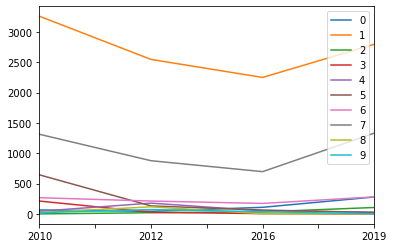

In [225]:
size.plot()

Something happened in 2016. But lets drop cat1 which take up half of my data and see the rest. and let's rename some of them

In [129]:
size = size.rename(columns={0: 'Romantic Love', 1: "General",
                  2: 'Copypasted', 3: "Tradition1",
                  4: 'Tradition2', 5: 'Weird Novel',
                  6: 'Cohabitation Postive', 7: "Cohabitation vs. Marriage",
                  8: 'Copy-pasted', 9: "New Value",})

In [130]:
size

Romantic Love  General  Copypasted  Tradition1  Tradition2  Weird Novel  \
2010             65     3259           0         212          44          644   
2012             43     2547          20          27         178          132   
2016            109     2250          34           5          50           64   
2019            279     2797         106           0          28           24   

      Cohabitation Postive  Cohabitation vs. Marriage  Copy-pasted  New Value  
2010                   267                       1313           23         21  
2012                   212                        877          117         72  
2016                   173                        697            3         36  
2019                   281                       1332            3          1

In [207]:
size

Romantic Love   General  Copypasted  Tradition1  Tradition2  \
2010       0.011115  0.557285    0.000000    0.036252    0.007524   
2012       0.010178  0.602840    0.004734    0.006391    0.042130   
2016       0.031862  0.657702    0.009939    0.001462    0.014616   
2019       0.057514  0.576582    0.021851    0.000000    0.005772   

      Weird Novel  Cohabitation Postive  Cohabitation vs. Marriage  \
2010     0.110123              0.045657                   0.224521   
2012     0.031243              0.050178                   0.207574   
2016     0.018708              0.050570                   0.203742   
2019     0.004947              0.057926                   0.274583   

      Copy-pasted  New Value  
2010     0.003933   0.003591  
2012     0.027692   0.017041  
2016     0.000877   0.010523  
2019     0.000618   0.000206

In [261]:
new_size =  size.drop(['Copypasted','General','Copy-pasted'],axis = 1)
new_size

Romantic Love  Tradition1  Tradition2  Weird Novel  \
2010             65         212          44          644   
2012             43          27         178          132   
2016            109           5          50           64   
2019            279           0          28           24   

      Cohabitation Postive  Cohabitation vs. Marriage  New Value  
2010                   267                       1313         21  
2012                   212                        877         72  
2016                   173                        697         36  
2019                   281                       1332          1

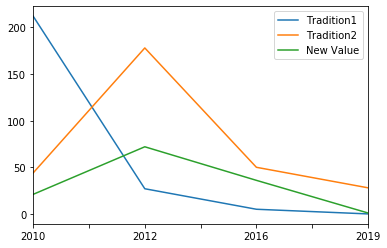

In [263]:
ax = plt.gca()
size.plot(kind='line',y='Tradition1',ax=ax)
size.plot(kind='line',y='Tradition2',ax=ax)
size.plot(kind='line',y='New Value',ax=ax)

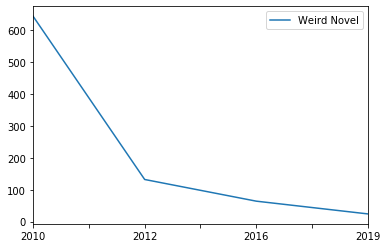

In [265]:
ax = plt.gca()
size.plot(kind='line',y='Weird Novel',ax=ax)

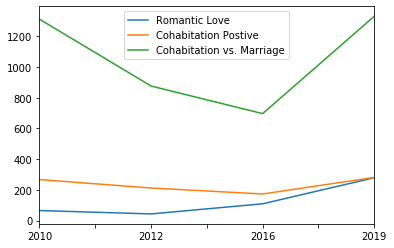

In [266]:
ax = plt.gca()
size.plot(kind='line',y='Romantic Love',ax=ax)
size.plot(kind='line',y='Cohabitation Postive',ax=ax)
size.plot(kind='line',y='Cohabitation vs. Marriage',ax=ax)

Lets break down cat1 even further

In [270]:
Cat1 = data.loc[data['kmeans_predictions'] == 1]
Cat1

Posts      User Names  \
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
9      :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...           橘子Dan   
10     :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...            飞天凡草   
12             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
14               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
16                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
19     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
21     :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...            小白有菜   
22     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
23         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
25     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
26       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
27     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
28     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
29                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
30     :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发...           文侠罗竖一   
31     :DVD剧情片《血之芬芳》，播放：http://sinaurl.cn/haSTn ，海报：h...       dvdkankan   
32     :(1/2)2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开始发生...             王学宗   
34     :宿舍里这帮乌烟瘴气的家伙，时常幼稚可笑，庸俗无趣，与其同居一室，更时常悲从中来！但已比在一...            转水转山   
35     :我天天念叨着同屋最害怕的问题 我说把她分到鄂尔多斯分行了 哈哈~ 我俩这14天的＂同居＂生...          JoryaV   
37        :很反感几月几号电影同居 他也认同引入一天 人体育人员让头发也会让他会有反弹后有人太阳人同意         刘小敏_172   
38     :刚才听到一评论大陆台湾关系的精典言论：台湾只想和大陆同居不要结婚！强啊！在电视上拿非正常男...       redpaopao   
43     :裸婚:不买房、不买车、不办婚礼、不买婚戒、不度蜜月，只与双方家长见面即可。其实很多人一直都...        胡赳赳_赳赳说字   
45     :堵车问题是北京产生大量剩男剩女的主要原因。据调查，北京恋人为了见一面吃个饭，耗费在路上的时...             葬花舞   
46     :网友把《蜗居》PK《奋斗》得出的结论：奋斗讲了几对年轻无知的男女的混乱爱情故事，主讲‘情’...            浩歌微语   
47            :一周同居三次 许慧欣郭品超热恋曝光 http://sinaurl.cn/hajf7      小丸子_GOGOGO   
48                   :日本女性不再蜗居愿同居http://sinaurl.cn/haRE4          ZJ同学同学   
50                :周迅被曝与阔少王朔同居怀孕 http://sinaurl.cn/han5D           看我就吻你   
52      :日本女性不再蜗居愿同居：http://sinaurl.cn/haRE4 合租在日本尚属新鲜事物             美剧迷   
...                                                  ...             ...   
21978  :看到微信运动推送，说我今天走了8888步，就很惊喜，这么吉利的数字，结果打开排行榜一看，发...         何吟Helen   
21980  :#同居人是猫##和汤圆的日常#\n今天追了同居人是猫\n真的好感动 平淡的故事但是好几次泪...          咱们都会发亮   
21981                             :刘诗诗现身公寓门口与吴奇隆前后脚出现疑同居         可可柔媚小女人   
21982                          :白天做夫妻，晚上做邻居，同居不同心，搭伙过日子。          霖哥是我小妞   
21988  :孟美岐你死不死？来看看恶臭孟美岐粉张口造谣，哪一个队友粉没被他们空口造谣过孟美岐滚出娱乐圈...            圈内神评   
21989  :耶和华的律法全备，能苏醒人心；耶和华的法度确定，能使愚人有智慧。(诗篇 19:7 和合本)...        Penny潘大妮   
21991  :同居后才发现原来他是这种人…#快手小剧场 #二次元 #爱情 @快手小剧场#记录世界 记录你...       阳光海滩54887   
21992  :#和许老师同居了么# 还没有昂 图一和丁哥的唠嗑，图二许大军看我和丁哥唠嗑的repo哈哈哈...         许老师的牛哥哥   
21993       :同居（試婚）\n\n以前覺得不重要，現在後悔也來不及了，原來我們的生活一直那麼不一樣！            微醺雪茄   
21995  :你今天回和前任同居的房子了\n希望你能好好休息放松\n中外友谊长存\n你的作品集里面有用他...        内在腐烂_444   
21996                                    :同居的你@可乐少女__ 北京         jjjanat   
21997                                             :合法同居人          静静ed时光   
21999     :等我毕业了我要写本书 书名就叫如何在精神病舍友的压迫下搞科研 或者叫与三百万债主的同居生活        敲代码的石原里美   
22001                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
22002                                         :想和成熟的女性同居             亖w亖   
22003                                     :#同居后最容易闹矛盾的点#            割白菜的   
22004  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
22008  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
22009  :猫传染性腹膜炎是感染猫冠状病毒而引起的疾病，传染率非常高。一般认为是经口鼻感染。病毒携带猫...            大菊很重   
22011  :#peewee日常##peewee近期的精神文明建设#\n北京最喜欢的季节\n和我卷妹同居...          Peewee   
22014        :发布了头条文章：《婚姻手记之婚前同居篇》 您身边的私人法律顾问 婚姻手记之婚前同居篇           律法人生1   
22015  :#同居后最容易闹矛盾的点##情

In [271]:
max_df = 0.8
min_df = 3
vecttfidf = TfidfVectorizer(max_df = max_df, 
                       min_df = min_df, 
                       token_pattern=u'(?u)\\b[^\\d\\W]\\w+\\b')
term_matrix_tf = pd.DataFrame(vecttfidf.fit_transform(Cat1.Cutted_Posts).toarray(), columns=vecttfidf.get_feature_names())
term_matrix_tf.head()

__   aa  aa制  abo   ac  acfun  adele  akb48  alex  ali  ...   鼓掌   鼠精  \
0  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0  ...  0.0  0.0   
1  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0  ...  0.0  0.0   
2  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0  ...  0.0  0.0   
3  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0  ...  0.0  0.0   
4  0.0  0.0  0.0  0.0  0.0    0.0    0.0    0.0   0.0  0.0  ...  0.0  0.0   

    鼻子   鼻屎   鼻涕   鼻血   鼾声  齐心协力   龙哥   龙年  
0  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
1  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
2  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
3  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  
4  0.0  0.0  0.0  0.0  0.0   0.0  0.0  0.0  

[5 rows x 10036 columns]

在分下去应该也没什么结果了
用别的方法吧

In [277]:
posts = Cat1['Posts']
movies = []
hashtags = []

for post in posts:
    movie = re.findall(r'《\w+》',post)
    movies.append(movie)
    
    hashtag = re.findall(r'#(.*?)#',post)
    hashtags.append(hashtag)

10853

In [283]:
movie_yes = []
for movie in movies:
    if len(movie) == 0:
        movie_yes.append(0)
    else:
        movie_yes.append(1)

In [286]:
n=0
for move in movie_yes:
    if move == 1:
        n+=1
n

1031

In [284]:
Cat1['Movie'] = movie_yes

C:\Users\65697\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


In [285]:
Cat1

Posts      User Names  \
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
9      :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...           橘子Dan   
10     :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...            飞天凡草   
12             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
14               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
16                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
19     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
21     :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...            小白有菜   
22     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
23         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
25     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
26       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
27     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
28     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
29                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
30     :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发...           文侠罗竖一   
31     :DVD剧情片《血之芬芳》，播放：http://sinaurl.cn/haSTn ，海报：h...       dvdkankan   
32     :(1/2)2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开始发生...             王学宗   
34     :宿舍里这帮乌烟瘴气的家伙，时常幼稚可笑，庸俗无趣，与其同居一室，更时常悲从中来！但已比在一...            转水转山   
35     :我天天念叨着同屋最害怕的问题 我说把她分到鄂尔多斯分行了 哈哈~ 我俩这14天的＂同居＂生...          JoryaV   
37        :很反感几月几号电影同居 他也认同引入一天 人体育人员让头发也会让他会有反弹后有人太阳人同意         刘小敏_172   
38     :刚才听到一评论大陆台湾关系的精典言论：台湾只想和大陆同居不要结婚！强啊！在电视上拿非正常男...       redpaopao   
43     :裸婚:不买房、不买车、不办婚礼、不买婚戒、不度蜜月，只与双方家长见面即可。其实很多人一直都...        胡赳赳_赳赳说字   
45     :堵车问题是北京产生大量剩男剩女的主要原因。据调查，北京恋人为了见一面吃个饭，耗费在路上的时...             葬花舞   
46     :网友把《蜗居》PK《奋斗》得出的结论：奋斗讲了几对年轻无知的男女的混乱爱情故事，主讲‘情’...            浩歌微语   
47            :一周同居三次 许慧欣郭品超热恋曝光 http://sinaurl.cn/hajf7      小丸子_GOGOGO   
48                   :日本女性不再蜗居愿同居http://sinaurl.cn/haRE4          ZJ同学同学   
50                :周迅被曝与阔少王朔同居怀孕 http://sinaurl.cn/han5D           看我就吻你   
52      :日本女性不再蜗居愿同居：http://sinaurl.cn/haRE4 合租在日本尚属新鲜事物             美剧迷   
...                                                  ...             ...   
21978  :看到微信运动推送，说我今天走了8888步，就很惊喜，这么吉利的数字，结果打开排行榜一看，发...         何吟Helen   
21980  :#同居人是猫##和汤圆的日常#\n今天追了同居人是猫\n真的好感动 平淡的故事但是好几次泪...          咱们都会发亮   
21981                             :刘诗诗现身公寓门口与吴奇隆前后脚出现疑同居         可可柔媚小女人   
21982                          :白天做夫妻，晚上做邻居，同居不同心，搭伙过日子。          霖哥是我小妞   
21988  :孟美岐你死不死？来看看恶臭孟美岐粉张口造谣，哪一个队友粉没被他们空口造谣过孟美岐滚出娱乐圈...            圈内神评   
21989  :耶和华的律法全备，能苏醒人心；耶和华的法度确定，能使愚人有智慧。(诗篇 19:7 和合本)...        Penny潘大妮   
21991  :同居后才发现原来他是这种人…#快手小剧场 #二次元 #爱情 @快手小剧场#记录世界 记录你...       阳光海滩54887   
21992  :#和许老师同居了么# 还没有昂 图一和丁哥的唠嗑，图二许大军看我和丁哥唠嗑的repo哈哈哈...         许老师的牛哥哥   
21993       :同居（試婚）\n\n以前覺得不重要，現在後悔也來不及了，原來我們的生活一直那麼不一樣！            微醺雪茄   
21995  :你今天回和前任同居的房子了\n希望你能好好休息放松\n中外友谊长存\n你的作品集里面有用他...        内在腐烂_444   
21996                                    :同居的你@可乐少女__ 北京         jjjanat   
21997                                             :合法同居人          静静ed时光   
21999     :等我毕业了我要写本书 书名就叫如何在精神病舍友的压迫下搞科研 或者叫与三百万债主的同居生活        敲代码的石原里美   
22001                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
22002                                         :想和成熟的女性同居             亖w亖   
22003                                     :#同居后最容易闹矛盾的点#            割白菜的   
22004  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
22008  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
22009  :猫传染性腹膜炎是感染猫冠状病毒而引起的疾病，传染率非常高。一般认为是经口鼻感染。病毒携带猫...            大菊很重   
22011  :#peewee日常##peewee近期的精神文明建设#\n北京最喜欢的季节\n和我卷妹同居...          Peewee   
22014        :发布了头条文章：《婚姻手记之婚前同居篇》 您身边的私人法律顾问 婚姻手记之婚前同居篇           律法人生1   
22015  :#同居后最容易闹矛盾的点##情

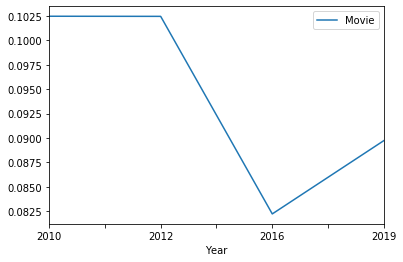

In [287]:
Cat1[['Movie','Year']].groupby('Year').mean().plot();

In [290]:
rest = Cat1.loc[Cat1['Movie'] == 0]
rest

Posts      User Names  \
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
12             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
14               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
16                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
19     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
22     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
23         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
25     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
26       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
27     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
28     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
29                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
30     :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发...           文侠罗竖一   
32     :(1/2)2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开始发生...             王学宗   
34     :宿舍里这帮乌烟瘴气的家伙，时常幼稚可笑，庸俗无趣，与其同居一室，更时常悲从中来！但已比在一...            转水转山   
35     :我天天念叨着同屋最害怕的问题 我说把她分到鄂尔多斯分行了 哈哈~ 我俩这14天的＂同居＂生...          JoryaV   
37        :很反感几月几号电影同居 他也认同引入一天 人体育人员让头发也会让他会有反弹后有人太阳人同意         刘小敏_172   
38     :刚才听到一评论大陆台湾关系的精典言论：台湾只想和大陆同居不要结婚！强啊！在电视上拿非正常男...       redpaopao   
43     :裸婚:不买房、不买车、不办婚礼、不买婚戒、不度蜜月，只与双方家长见面即可。其实很多人一直都...        胡赳赳_赳赳说字   
45     :堵车问题是北京产生大量剩男剩女的主要原因。据调查，北京恋人为了见一面吃个饭，耗费在路上的时...             葬花舞   
47            :一周同居三次 许慧欣郭品超热恋曝光 http://sinaurl.cn/hajf7      小丸子_GOGOGO   
48                   :日本女性不再蜗居愿同居http://sinaurl.cn/haRE4          ZJ同学同学   
50                :周迅被曝与阔少王朔同居怀孕 http://sinaurl.cn/han5D           看我就吻你   
52      :日本女性不再蜗居愿同居：http://sinaurl.cn/haRE4 合租在日本尚属新鲜事物             美剧迷   
53         :分享寂静之声的博文：结婚与同居有什么不同 http://sinaurl.cn/haTMO         西塘的幸福人家   
56     :与老外同居 让我痛不欲生: 我和布特是在学校的图书馆认识的。那时我已经读到二年级，对学校里...        醋溜蛋蛋_994   
57     :法国通过新法律，辱骂配偶（包括妻子、丈夫、同居伙伴）者属于犯罪。犯法者不仅可能上法庭，而且...     没有人比我更懂杭之冯玥   
62     :昨晚收到一条信息：爸妈，我和异性同居被查，速交五千元罚款到刘警官的卡上，农行6228483...           我的小雪儿   
63                                                :我被同居了            MT小星   
...                                                  ...             ...   
21975  :《“重婚”与“有配偶与他人同居”的区别》重婚、有配偶与他人同居，这在法律条文中有专门的解释...            马兰花美   
21976  :迫不及待想要和皓皓同居 每天逛着淘宝看需要带过来的东西\n但我好害怕 每当我很期待一件事情...           嗷嗷的宝宝   
21977                                :谈恋爱同居需谨慎 专员蜀黍的微博视频            全民护汪   
21978  :看到微信运动推送，说我今天走了8888步，就很惊喜，这么吉利的数字，结果打开排行榜一看，发...         何吟Helen   
21980  :#同居人是猫##和汤圆的日常#\n今天追了同居人是猫\n真的好感动 平淡的故事但是好几次泪...          咱们都会发亮   
21981                             :刘诗诗现身公寓门口与吴奇隆前后脚出现疑同居         可可柔媚小女人   
21982                          :白天做夫妻，晚上做邻居，同居不同心，搭伙过日子。          霖哥是我小妞   
21988  :孟美岐你死不死？来看看恶臭孟美岐粉张口造谣，哪一个队友粉没被他们空口造谣过孟美岐滚出娱乐圈...            圈内神评   
21989  :耶和华的律法全备，能苏醒人心；耶和华的法度确定，能使愚人有智慧。(诗篇 19:7 和合本)...        Penny潘大妮   
21991  :同居后才发现原来他是这种人…#快手小剧场 #二次元 #爱情 @快手小剧场#记录世界 记录你...       阳光海滩54887   
21992  :#和许老师同居了么# 还没有昂 图一和丁哥的唠嗑，图二许大军看我和丁哥唠嗑的repo哈哈哈...         许老师的牛哥哥   
21993       :同居（試婚）\n\n以前覺得不重要，現在後悔也來不及了，原來我們的生活一直那麼不一樣！            微醺雪茄   
21995  :你今天回和前任同居的房子了\n希望你能好好休息放松\n中外友谊长存\n你的作品集里面有用他...        内在腐烂_444   
21996                                    :同居的你@可乐少女__ 北京         jjjanat   
21997                                             :合法同居人          静静ed时光   
21999     :等我毕业了我要写本书 书名就叫如何在精神病舍友的压迫下搞科研 或者叫与三百万债主的同居生活        敲代码的石原里美   
22001                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
22002                                         :想和成熟的女性同居             亖w亖   
22003                                     :#同居后最容易闹矛盾的点#            割白菜的   
22004  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
22008  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
22009  :猫传染性腹膜炎是感染猫冠状病毒

In [291]:
rest.shape

(9822, 16)

That's still 45% of the data unexplained.

In [31]:
data = pd.read_csv('C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/data/Cleaned Data with kmeans labels')
data.shape

(18345, 14)

Lets see the general descriptive data of different years as well as the rest of the clusterings

In [30]:
def stopwordslist(filepath):
    stopwords = [line.strip() for line in open(filepath, 'r', encoding='utf-8').readlines()]
    return stopwords

In [46]:
stopwords = stopwordslist('C:/Users/65697/OneDrive/Study/MAPSS Thesis/WeiboKeywordSpiderbyTime/WeiboKeywordSpiderbyTime/hit_stopwords.txt')

In [80]:
c = []
for a in data['Cutted_Posts']:
    for stop in stopwords:
        if stop in a:
            a = a.replace(stop,'')
    c.append(a)
c

 女人 失恋 后  听 大家 都 普遍 反映 前男友 新 找   姑娘 没  好看  通常 都 会 无 强烈  暗爽    70    大杂烩 上 看   居  定   方 家里  样 不下去   拍拍 屁股 走 人  不  人 看  堆 烂摊子 独 垂泪 黯然神伤 
  恋爱 前 规  部 电影 拍  点  不  原著  空姐 居  日子   精彩  些 网络小说 改编 成 电影 后 真 大折扣   次 亲密 接触    样 
  东西 少  只  搬家 都  大 工程     居  聊天  算  家里 放 块 匾  上书  弱智儿童 欢乐   七 大字   房门口 书  弱智儿童    房门口 书  欢乐   
 看  恋爱 前 规   小说 产生  兴趣   空姐 居  日子  找出 看  刚刚 看 完  无限 yy

  1  2  知道 周迅  越越   知道 鲁迅  越越少  知道 马克  越越   知道 马克思  越越少  知道 尔  越越   知道 保尔  越越少  肚子 大  人 越越   肚量 大  人 越越少  未婚居  越越   婚后 居  越越少  耍手腕  人 越越   耍手艺  人 越越少  出书  人 越越   读书  人 越
 只  星期  原 不 认识  人  确定 恋爱 关系  居  不 知道  现  些 人太  急     思想 out   接受 不 
  蜗居     方 不解    海藻  宋思明 发生 关系 难道  海藻  次   前 海藻  小贝  居    什 会 流血  难道  太 激烈    想 知道 血  回事   
   人间 失格  深深 产生  共鸣   解  下 作  太宰 治  居 女友 不 处女  携 女友 杀 … 爱  太 深刻  罢 …
    异性 网友    老乡  通 网络 认识   男青年  两人 很快 坠入 爱河  居  后  男子  两人 不 合适     未 提出 分手   告诉     找  男孩子      很 不错  女孩     做 
    新年 愿   1  早发 sci 早 轻松  2  早 找 工作 早皮  3  早 找 房子 早 居 
 〖 感情 运 〗 决定   人 进驻  生命    今年 「 决定    人 走进 生命 里   许  居  不婚  许  迫 

 今天  egg   丽娜   友狼  聚会   真 开心 ~ 大家 近况 都 还 不错   疑问  现 难道 航 领证 不 居   期 明年  510 小美妞 很 幸福
 读书  想象  无数次  闺蜜  居 生活 真    许   太久 前  想象    真 实现   刻    都 些 慌张    好久 没 想象  未    样   未  什    都 不会 慌张      
  中国籍 女子  认识  六年  居  三年   疯狂 聊天  凌晨 五点   陌生  城市  只   身 时才   独特  安全感 …
 欲  渔网  老公  劳工  晚上  玩赏  云雨  孕育  升职 便 升值  居 便 痛聚  誓言  失言  男人  难人  理想  乡  缘分  怨愤  癌症  挨整  失去   拾取  研究  烟酒  清醒  庆幸 ! 转发  赚发 
  社会 乱象  ● 没 结婚   结婚  样 居  结婚   没 结婚  样 分居 ● 动物  人 样 穿衣服  人 动物 样 露 肉 ● 小孩  大人 样 成熟  大人  小孩 样 幼稚 ● 女人  男人 样 爷  男人  女人 样 娘 ● 没钱   钱  样 装富  钱   没 钱  装穷 ● 情人  夫人 样 四处 招摇  夫人  情人 样 深居简出 !
 回复   腿 骨折  居     请 上传   检查 片子  便 医生 解 病情  出 诊疗 建议  方法    片子  白色 光源  背景   数码相机 拍 成 片  建议 相素 不 超 500 万    话框 右侧  上传   病历 资料  中 上传 
 童鞋  星期天  搬走    时 剩下        只 最后  星期   居  
 哥 搬 去 单人间   求 居
 身  人   恋爱  恋爱  居  居  怀孕  怀孕  结婚  结婚    想 最 刺激  应  天 内 完成      大概  疯  
   艳遇  居  夜 长大   
 最近  居 密友 F 迷上  非诚 勿扰   饭  … …
  骗子 真逗    爸妈    朋友 居  公安 抓住  速去 邮  政 5 千元  6210985810003184983 李琴 警官  户 上 放人 急  不 电话  详情 出 
 说好   仨  唱  老婆   ~   ~ 唱    都 

 居  女友  失恋   哭  死去活       关 小三  事  恢复元气 总 需 段时间  道理  明显   真  遇   面 时  需 特  勇气   都 帮不 失恋  人  明知 痛苦  不 投入 太  情感    情感  控制    
 前 采访  丁嘉莉  糟    丽  莉  写错    真 实  会儿  正  人 居   住  青艺 宿舍   劲松 儿     记  特孝  不大  房子   老妈  接   住
  大云 哥哥  韩庚  脑子  毛病   干   李小璐 居   气死    李小璐  90 后   女明星 不  灵  
 会 !   改革  六大 成绩  房产 改革 口袋 掏空  教育 改革 父母 逼 疯  医疗 改革 提前 送终  企业 改革 下岗 停工  政府 改革 机构 臃肿  婚姻 改革 居 成风
   AA制 恋爱  AA制 居   千万 AA制 结婚  什 都 分 清清楚楚  没法 日子    旦 结婚     没法 保全   份  结婚 势必  奉献  婚 势必  损失 
 居 不 结婚   最后 受伤  会     
   小屋 两 小床   大床 取代  … 感觉 心里 点 空   觉 真  彻底 告 前  姐姐  年   居 生活    只 回忆  … 今后  人 躺  大大 双人床 上 肯定 会 寂寞 孤单  书桌  小 书架  没  … 真 很空   前  乱七八糟  小东西 小 回忆   … 很 都 不  …  感慨  实  青春  记忆  …
 曾 感动    书  王朔  空中小姐   空姐 居  日子 好  
 19 号 快       骗 会 去 美国 年 … … 混蛋 … …  快  开 见面会   人  重心 转移  中国    居 算     北京 定居  … …
 A  B 求婚  B 允   两人 登记 结婚     婚后 日子  不  A 早先 想象   完美  A 后悔    B 告上 法庭   非法 居    法官 判 B 败诉  强占 民女  赔偿 A 青春 损失费 干 … …
 现  小 三  仿佛 已 成  司空见惯  事    还  孩子 生 下  没    孩子 想   畸形 社会   未婚居  正常  不   反 成  反常   诸  实际 原   理解   成   社会

 什 鬼天气  莫非 夏天  冬天 真 居  
 老天    不  春天  冬天 居   生出   鬼天气  
 谈  节课  青春 损失费    居  结婚 后 分开  双方   延续 期间 时间  度  提出 青春 损失费  不 尊 不 爱 
 男人  果  真 爱  人  请   实际  安全   婚姻  房子   不 敛财    责  试问  纯洁  女生   愿意 先 选择 居   放弃 婚姻  试问  男人 愿意   新婚 妻子 N 夜 后  人    破 切  非   坚定  爱  相信   勇气  果     责  男人   会 忍心    堵 上 生 
 安室 奈 美惠  谐星 男友 居    年内 结婚  图   
 居 7 年    男友 却没 抵御 90 后  诱惑 …
 真实 社会  社会   不断 发展   思想意识   不断 变化    倒退  进步 言早  50 后 看不惯 60 后  60 后 看不惯 70 后  次 类推  十年 前 结婚 还 不 知道 象 什样  十年 前  恋爱 初现  现 婚前 居 很 普遍      言   认   封建  性  人  然 需求   搬  桌面  不信    看 
 社会  男子 强暴 女孩 胁迫 居 五年    裸 贴遍 全村  图   不 贴  
 四位 居   室友   兴奋  码  长城    怜   麻 痴    点  不会 麻   
 乔治  桑 罗嗦  无聊   煽情    时  勾搭 上  文艺 爷 都   腿  看看   情夫 名单   勒  巴尔扎克  萧邦  李思特  福楼拜  屠格涅夫     怜  丈夫   十足 倒霉蛋   老婆  情夫 私奔 居  居然 还   分割 财产  索 赡养费 包 小白脸  作 乔治  桑  丈夫   真 窝囊 透  
 路姐  家里   布置 出 间 房间  号称    闺房    美 嘞
 女子 遭强暴 后 迫 居 5 年   裸  贴 全村  
 未婚居  越越   婚后 居  越越少  耍手腕  人 越越   耍手艺  人 越越少  出书  人 越越   读书  人 越越少  养 二奶  越越   养 奶奶  越越少 
       未婚居  越越   婚后 居  越越少  耍手腕  人 越越   耍手艺  人 越越少  出书 

 大学 居  去 发生  大学  女生 怀孕    开  事情   学校  责  告诉 孩子  避孕   不 开    李银河 说  李银河  笑 称   全世界  大学 都  学生 居 现象  果 不 中国 学生 居  好 点  不人道     意 李博  观点  还 延伸 推崇 李博  诱导  推理 思路  都 样  天 太平 
 春天    小鸟 恋爱   蚂蚁 居   蝴蝶 婚   毛毛虫 改嫁   青蛙  生 孩子    还  什  
 寝室 人  看   空姐 居  日子  看  无 欢乐   外   看  MOTHER 后  处 低气压    
 春天    小鸟 恋爱   蚂蚁 居   蝴蝶 婚   毛毛虫 改嫁   青蛙  生 孩子    还  什    寄语 单身  朋友 
 看 完  空姐 居  日子  感觉 挺舒服   喜欢 姚晨  老凌  喜欢  电视剧      点   陆飞 太  人 急   不 麻利 儿  表白    揪  半天  心   
  居  解决 蜗居 问题  样 
  董先生 看 法制 进行 时  省略 赘述  末  说  句    姘头    嫌  词 太重  姘头  未婚居 发生 性关系  前   贬义    今  道德 开放  时代   已然   中性词   少  认  中性    击面 真 太 大 
 李银河 称  全世界  大学 都  学生 居 现象  不 中国 学生 居 好 点 不人道  居 不 影响 学业   不 说 弊端 很 
 果 女友     居   会 办  怕  晚上   会 做 不   事 
 Rock   Hudson 洛克 德森  Cary   Grant 加里 格兰特  Marlon   Brando 马龙 白兰度  Gregory   Peck 格利 高里 派克    中间  Rock  G  gary  男朋友 居  marlon  bi 最后 还  男朋友 葬   真 好腐  片 
 初恋情人  全 新版  旧情 复燃  翻版  婚前 居  试行 版  金屋藏娇  珍藏版  新婚夜  正版  爱上 寡妇  修正版  勾引 人妻  盗版
  已 28 岁    读 博士   交 年  女朋友   没 钱 买房子  前途 迷茫   不出 百元  校外 租房 居   嘲    28 岁 老处

   仓鼠 夫妻  居 生活 ~
  大家 推荐 书  空姐 居  日子    书  不 姚晨演  烂 电视剧    看   知道  真   好  书  遭塌 
 居 
 什 婚前 居  非法    未婚 先育 却 合法  
 时下系 广州 嘅 大学生   全国 都 系  情侣 毕业 分手 高峰   广州 今年  啲 唔   今年 企 毕业 后 会 选择 合租    住 居    住 试婚     住  做 埋  应 做 唔 应 做 嘅 野  直 做 埋 老豆 老母  真系爽  条龙 服务  人生 真系变 咗 条 直线  点解 会 咁 
 芳姐 看   回 后  只见  两次 面  次  家  次  家  没 回     老 问  什  回  说 想见   回 后  见面  机会  不    居   城市 里    样    问   终身大事  没戏      紧 下手    目标 都 没    下手    不 急   身  人 急  
  急 说  句 求 回龙观 居  
 女孩 居  认清 4 大 陷阱  
 很晚     去   空姐  居    
  居 …  
 大家  看 婚前 居 件 事  
 居 三年  甩  还   幸福  
 好   好书 推荐     居 美女 上司   
 爱  内科 老师  蚊子 喻 成  空姐   真 相 服   老  果  样   天天 空姐 居    …
  快乐  小 2B   1 集   大学生 居  事儿  原班人马 新剧 
 七尺 男 惨遭毒手 变 侏儒   痴情女 真情 不变 仍 居   名 侦探 柯南   无耻 幼童 整日 胡言乱语  终日 W   X 年长 女性 乐     蜡笔小新   销魂  白衣 女子 玩弄 五 男生 生 !     圣斗士 星矢   强不息  无指 少年 科技 创新 搞 发明     机器猫   亲生父母 竟成 禽兽  未成年 少女 迫 卖身 洗浴 中心     千千寻
 身  事   恋爱 年  事  女友  求 下 分手   说 居 2 年  什 事 都 没 发生    事 结婚 四 月  老婆 外遇  2 人 婚   5 月   分手 月 
 两 人     不 总 维持  状态 太久   需 不断  突破    进展    阶段    阶段    俩 人   谈恋爱    

  2  3   听  小  伤感  记  小马 居  日子  次 下雨  都  电话 问  带 伞 没  时 挂 完 电话 五分钟   出现   面前    雨势  都 快  二十八 晚上 下雪       送  雨衣 后 才 回  家  今晚 …    住  女孩   伞   上班  方  说  外面 下  好 大  雨     走    纠结  死  回去 时 街上 堆满
  样   居  …
 「 居  犯  条 罪    爸妈 问
 今晚   角角 去 操场 走  好好 圈    晃  三年    明年 今日 不 知道 大家 都 会  里   还 记 高三  暑假   很 担心  大学 会 不会  怪人 居   还好   遇   三   11  320  26  411    爱  仨 
 什  二奶   妇夫 居  女人  女人 什 成 二奶     钱  二  情  先说  原  不 成  谴责 二奶  理  大 环境 说  中国 性歧视  传统 源远流长  便 今天   出生  教育  家庭 位  业  方面  女孩 都 很 难 获  男孩 样  平     歧视 消失   才  谴责      
 回  焦作  去 看   大学 学   最好  女朋友  生活  很 辛苦  只怪 初  外  男生 居  太 早   还 没    介绍   哥哥  果 成    嫂子  会 很 幸福  不 受    苦   只 相信     切都 命 
 四旬 男子 扮 女装  丈夫 居 7 年  识破  
 家  papa  很 爱 很 贴心  善解人意  不知不觉   居 六年   实 已 长大   还 总 小孩 看   屡屡 然 卷曲  金黄  长发 飘逸    见  都 想 去 摸 下  不 言语  特 观言察色  次 回家  总 抢     开门  见面 定 亲  下 
 刚 听说   分开 居  太 才  
 踢 完波 翻  今日  太阳 太 毒辣辣   晒   红 晒   居 室友 居然 想 争 凉 房   都 系 实况 决胜  2 胜 1 平  成绩 令距 无语  乖乖 出 凉 房       休闲  日子 真系 写意  搞   唔 想 工作   
 Google 公司 宣布  日   公司  性恋 员工  工资  高 异性恋 员工  年 650 元

 今日 搬 左屋  新 居 劈酒  应景  分享 HL 嘅 句 典白  嬉皮  人 千杯不醉      HL
 累 崩溃         电脑 发呆  ppt  写 不出       居 密友  吉野家 不开  碗 茶碗 蒸蛋 抓狂     国际饭店 没 乐  没 烟    世界末日             
  抓马   Ｐ ｕ ｎ ｃ ｈ    子安 武人  中村 悠  遊佐浩二  森川 智   笹沼   晃  高 橋 広 樹  职场  居   前  BT 老猫  暴力 蹭  累肉村  老猫   正   没 2 轨  BT 全开   最 普通  态度 讲 最 猥琐  话语       事  辛苦        感情 观上 好 茉莉 才  最  谱   原作   鹿 し う こ 
  90 后  女孩 问   什  姘头      没 成 夫妻 却 发生 性关系  男女   背   家庭  外面  奸情         很 不 结婚  居  些  小 三    都  姘头          不  毒害 祖国  下代
 壳 壳  草龟 只   算 见  大 世面     做 动车    上海  天津   返程   坐飞机   没 再   带回 上海  后    上   飞飞 居  日子  记  次   放 家  透明 桌子 上    很 惊恐  下 张  步  不敢 爬  好 怕 掉下去  样子  傻   真 爱     小小 动物园
  居 久    吾 好 再 动动去      点 安全感     认    睡 安乐 觉   只 今晚 次  
  宅     去  长春       大家    不 见 好久  … …  
 拍死 只 身长 2CM  巨型 苍蝇   纸巾 包  想 丢掉  手上 犹豫  下  试 捏 捏 肚子  团 白色  东西 爆  出  散成 条条    平常 看  米黄色  椭圆  不  些 只 头  黑色   身体  纯白  细长     草尖  小 庆幸 下  差点 房间 里    群 居   
 开 二奶  二奶  界定  学校 取证  权利   二奶  非法 居 话  学校 不  非法 取证   开  包   包   人   单位  不 开   真够 愚昧    国家  最高 教育 机构  竟然 半点 法治 意识 都 没  人权意识

  ᄒ ᅡ ᆫ ᄉ ᅢ ᆺ  Raws    Ano   Natsu   de   Matteru   01  mp4  译   盛夏             花  样  片子    看 开场  UFO  挖 鼻屎   再 看 完 OP … 
  老 睡    仅   200 米   假设   超级 大  房子   算不算 居  躺  😜     不 小心   只 居  辣
 避免  嫁错 人   居 情侣  考虑 5 件 事  
 终 放假 考完试   最后 夜  2011 校园生活  无聊   看 电影  度  电影 名字 般   时尚 居    内容 很 好  感受 颇深  男主 常 说些 很 哲学 话   成功  失败  创业  太人 趋骛  梦想 夜 成名  然   少 人会 成 尔盖茨   少 人 成 明星   太少 太少    万分 都 没 
 毕业 天   抱   哭   劲
  怪兽 威蛋定 左  小 左蛋定  认出  居 男猫 威震 天 … 不 震惊 
 郎 骑 竹 马  绕床 弄 青梅  居 长干里  两小无嫌 猜  幸福  人儿 睡觉  
 相亲相爱 两天 滴  居 生活  准备 结束  
  裸婚    没 注意    已 裸婚   没 婚礼  没 戒指  没 房子  什 都 没  只 张 证书  证明   合法 居   没想 转眼 已   生活  7 年  男人  没 钱   赚  行
 刚才 看    时尚 居   里面  好 东西 真 很 现实  身上 最强  肌肉  心 
  看  周刊 拍  王菲  北京 胡 里  片    夜里  倒 夜壶  时   窦 唯 居   已   名  歌手    爱人 竟然 完全 不顾  身份   看  很 受 触动   很快  写出   愿意   
 后 死  都 吾 会 两  上 噶 女人 居  烦死  
 男子  百 充气 娃娃 居 实拍  男子  百 充气 娃娃 居
 婚前 居 助 於 财富 积累  
     点 才华  惜    胖子  还 穿 秋裤         知道       质感     摘   时尚 居   
 昨晚 吃  团年饭 后  久 未聊 私密 话  姐姐 聊天  原 找   男朋友   应    安稳 幸福  生活   却 不料   感情生活 再 掀 波涛    居

  法师 娶  小 三  挪 巨款 获刑   信徒 旁听席 念咒 喊冤  2007 年 10 月  湖南 娄底 天籁 寺 前 住持 圆通 法师  女子 杨 登记 结婚       女子 陈 居    陈 举行 婚礼   杨  报警  2010 年底  圆通 法师  挪资金  重婚  罪 获刑 6 年   法警  圆通 押入 法庭 时  旁听席 上 信众 立 齐呼   弥陀佛  冤枉   
   奇葩 居 女友  笑 死   直接
   书 里 森山 大道 讲     事  年轻 时    居 女友  感情 很 好  三年 后   小事  分手   20 年 后  巧合  再次    人住  城市   迷迷糊糊  走    人  家外  没想 邮箱 上    名字   走  门口   门铃 才 突然 醒悟   紧 开  里  时间  很 怕  东西
  恋爱  季节  单身  耻    居  季节  处 男  耻   人 说
 噻  肚子  垃圾 食品 后  还  喝 
 去 虎牙 电路图 小石头 居 图图   什   爸   听   vv
    居  7 年  男朋友 分    遇     不 三天  说 爱  无法拔    会信     愚蠢  人     
  搜索   五天  陌生 女人  相处 败    居 三年  恋人  太 扯淡     
 中国 文字  样  厉害    北京   背景    上海   商海    欲   渔网    老公   劳工    晚上   玩赏    云雨   孕育    升职  便 升值    居  便 痛聚    誓言   失言    男人   难人    理想   乡    缘分   怨愤    失去   拾取    
 糟  ~   枕  黑子 腿 上 听 黑子 安慰 补血  AHO 萌   变 不安  青峰 算 居   会 担心 黑子 开    不安 卑  ~ 家   总 默默    黑子 后面 不出 声怕 扰 黑子    总会 做点 小动作  引 黑子 注意   黑子 说   只会 蹭  累  说   意识 剩  继续  抱  不 撒手 什  ~ ~   萌   
 最 坚强  肌肉    心   周小辉   时尚 居 
  理想 很 丰满  现实 很 骨感  北京  背景  上海  商海  欲   渔网  老公

  朋友 关            公示    恋爱            公示 期    确定 恋爱 关系            确定 中标 候选人    婚前 居           非法 串标    婚前 约定            合 谈判    办 结婚证           签定 合    办 结婚 酒            图纸 会审     男方 钱            工程 预付款 
  蔡康永 爱情 短信   悠长  初恋 证明 够 共渡  困境    幸福  结局 显 脱俗 无名 份  更 温馨   百万  发 誓 爱侣 最尾  引退 无缘 份 居   老天荒 会 只  仍 爱 下去
 彩礼           投标 保证金     朋友 关            公示    恋爱            公示 期    确定 恋爱 关系            确定 中标 候选人    婚前 居           非法 串标    婚前 约定            合 谈判    办 结婚证           签定 合    办 结婚 酒            图纸 会审     男方 钱            工程 预付款
    汉字  智慧  玄机      北京   背景  正   政党  欲   渔网  老公   劳工  晚上   玩赏  云雨   孕育  升职   升值  居   痛聚  男人   难人  理想   乡  誓言   失言  信仰   心痒  缘分   怨愤  失去   拾取  清醒   庆幸 
  劲 爆  前天 凤姐 还 微博 爆料 嫌 林书豪 不够 帅    找 帅  男友  今天 凤姐 居 3 年  男友  爆出  大家  眼光  雪亮    林书豪    
 找 不   人 知道    时尚 居   最后  纯音乐  
  看 完 部     时尚 居  
  蛋蛋  居 生活 马上  结束 
 欢迎 新 室友
   House   M  D   S02E14  基友 婚姻  破裂  两人 正式 居  老夫老妻 时代  
 群 天使 般 孩子   都      澳洲   好  星期天 portanic   garden   见  带上  爱 吃   爱玩   男女朋友  燃 炉火  碳 烤 八珍  黄旗 

    现 大学生 居 居然  普遍    还  只  大 三才 会 发生  事  大 大 二  小毛 孩子 居然 已 做     认识  学弟 学妹  真没想      想  太 单纯     太 大惊小怪   弥陀佛 
 看  天涯  帖子  男生 大三 追  身 系花  女生  两人 居 三年  期间 男生 兼职  女生 享受  毕业 后 女方 家  出国  女生 偷跑 回国   50w  男友 创业  男友 致富   女生 只会 享受 不 工作 不 做 家务 性  脾气  三年 前 无异  男生 爆发    女生   间 错     变    变  许 都 没变  许 都 变  
 桌  桌  考试 时  救星  睡觉时  警卫  生病 时  仆人   桌 常常  最好  朋友  患难共  盟友     哭泣  倾诉  听  诉说  人  学校 生活 中  距  最近  人  桌 间  竞争  帮助  桌  必不少   桌  居  桌上  桌    相邻  座位 上  坐  人   
 实   不 赞成 婚前 居   突然 会 觉 婚礼 上 1 加 1  3   挺 好  安 
 偶  只 适合 远观   旦 生活   屋檐下   琐碎  真相 都 会 曝光   居  眼里  没 英雄   没 美人  只 日子  凡人 
 点击 右上角   星星   会  惊喜 发现        二 逼 流氓 女   清纯 小 邪恶    大学生  居   事儿 … …  
 爱情   否  走 下去 已 很 不 容易 更 不 说 居 结婚 白头老  够  恩  爱  二人 相爱 场  福气   否  勇气 去 进行 很 重  现  人 顾虑重重  思前思后   生活 求 太高   什  没   只 面 注定  孤独  果  喜欢 独处   陪伴 更 需 爱情 话   找   样  人     人活 好
 实   很 赞 婚前 居    不  结婚 后 发现 方 N   无法忍受  缺点  肿  办 
  婚姻      男女  世人 公开 居  证明    征求 人  意  需 大摆 宴席 好好  犒劳 犒劳 人   日 两人 组成  男女 济 合作社  男  职 老公  女  职 老婆   持续  死亡   大数 会 半途废    不会  小 三  产生   不会  

 小云  舅舅 讲    没 力 没 事业    不 居  太早 …    挖 鼻屎 
 忙碌 天 回家 看 袁妈 忙 进忙 出 收拾 家   顿时 幸福感 飙升
 彤彤  走    好 难 ~ ~ ~   十天  居 生活   
 怕 会 忘记     留下   记忆  20120216  相识  20120220  相见  20120423  居  20120615  分开  20120618   好  20120620  关系 改变  20120630  祝福  
 热烈祝贺  两只 正式 进入  居  状态  希 空空  持 住 
 曾  部 做  空姐 居  日子   声 小说 感动  塌糊涂  想想 时 真 年轻  
 闹心  行李 包 2 大箱  1 小箱 基 搞定   Rhymney   Street 家里  最后 天
   居   噩梦 
 年头 没 结婚   结婚  样 居  结婚   没 结婚  样 分居  小孩  大人 样 成熟  大人  小孩 样 幼稚  女人  男人 样 爷  男人  女人 样 娘  没钱   钱  样 装富  钱   没 钱  样 装穷  情人  夫人 样 四处 招摇  夫人  情人 样 深居简出 
 不 居  做 邻居  … … 猫 兄弟
 今天 看暮光 城  爱德华 说 结婚 年  最难       不会    高二 高三 年 半    居 生活   样 顾     会  小事 吵架   会  晚上 拥抱  笑   很 好    包容   很 爱  ♥
 明天 出发 去 上海   去 杭州 约见 居 密友 ~
 居 天 ~ 瑟 下 ~  害羞 … … … … … …
 亲爱     毕业   居 
 次   倾计 总会 捻 翻  居 葛 日子
 居 四年  兄弟 先滚 
  人  家人 外   需 朋友   看  朋友 间 聊  火热  再 看看   身 没  朋友   插 不 上 嘴  只 干 看  想 美美   想   居 生活  想 伙人 吃饭 … … 现 奔东西 南北   不 知道  才 聚聚
 今天   做  场 梦  早 开车 去 肇庆  曾  居 密友 见面  吃  顿 丰盛  午餐   逛  下 湖  回家   实  太 匆忙  都还没 见够   亲爱   
  谈恋爱      居 生活   两 程

   家伙 居 天 
 快 走人   最后 总结 下 大学 二大 悲剧  遇  厚颜无耻  贪无厌  辅导员   群 爱 挑拨间  没 口德爱 占 小便宜  小人 居 屋檐下  … … …   苦 逼  大学 生活  真心  觉 很 恶心 … … …
 金 小妞 回去    下子 都 不 适应   小妞 陪  睡  些 日子  认真 扮演 小 情人 滴 角色 … 爱   … 期  下场 居  …
 求 河西区 嘉茂 中心 附近 合租  房子   希  干净 干净 干净   希 居  室友  干净 好 相处    房子  人  联系    价格 合适      定 会 爱护  住  方    看  人 帮忙 转发 下   今天 天  附近 看房 看  心寒     租房  人 都  不 爱护  生活  方
 好 棒 噢 今天 终 找 玩       然 不 讲  好 私人  事情  人  欢乐  应 好 满足     老天   很棒 噢     室友 都 
 发表  博文     英日法  两小无猜        201209  07    郎 骑 竹 马  绕床 弄 青梅  居 长干里  两小无嫌 猜     不 知道  不  整首 诗  前 背  东西 已 渐渐 忘去   亦  作 不 白居易  统统 不记  
 团聚     团聚     次 居   酒店   继续 分床 睡   忽然 感觉  格局 点 年  中包 公寓   祝  好 梦  
 点 鄙视  点 羡慕 居  情侣      更 大  目标    去 骄傲  眼前  些  算    做  单纯  女孩子  不 轻浮  总天   坚持  立场 会 换 更 心安理  幸福 ~ ~ 握 下  做  做  事儿 ~ 刻   目标 很 明确  ~ 只 想不  没 做 不 ~
 爱死  不久  入住  house  ~ 美  觉  做梦 样  庄园 ~ 期 居 生活 快快  ~
     敢死队 2 太 好看   作 爆炸 控 血浆 控叔控  肌肉 控   说 部  蜘蛛侠 还 吸引    诺 州长  布鲁斯 州长 快 居  ~ 巴尼  圣诞 快去 领证  阴阳  岗纳  快点  谈恋爱 
 没 结婚   结婚  样 居  结婚   没结   婚  样 分居  动物  人 样 穿衣服  人 动物 样 露 肉  

 Q 先生    太太   认识 Q 先生  去年  参加  赛 时  事  会儿 觉 Q 先生 名字 很 趣  回  师傅 聊  才 知 Q 先生 曾  师傅  居 密友    Q 先生  手 好 厨艺  师傅  提 便 满脸  怀念  后 … Q 先生 成    战线  事  后    觉  结婚 … 实   件 不赖  事情 
 只  姐姐 家里 住  9 天     素 秋 蚊子    
  日常    楼上  楼下  邻居 超 常识  呼噜 声    忍不住 拉 娘  鉴定 下 不 幻觉  …  … 居然 超  爸    …  居  顿生 滔天 景仰 情 
 😆 😆 😆 开启 小罗  居 生活
  comico 捕捉 超 好看  漫画    白猫 王子    |   躯   |   前  意外 死去  爱 猫    好年 后 变成 名 男子    胆小 内  女主角 展开  居 生活 !  带 灵幻 色彩  爱情 物语    |   comico   –   免费  全彩 网络 条漫  
      没久 便  居  很 朋友 不 看好   感情  后  身 情金坚  例子 分手  历  爱情 长跑
 只 zqsg  站   真人 西皮  路   现     互相 去 方 家 玩  拍 再  居  阳台 上 挂  两人 换洗 衣服  毫不 避讳 家里 两人  生活气息  两人  养 两条 狗  空  遛狗  年 1  2 次 两人 单独 海外 旅行  不 缺席 方  演唱会  怕 翘班 请假 扔下  整 剧组 都    世界末日 天 共 心 晒 ins  惜 BE 
 拍拖 两年  居 年  基 没 争执 没 吵 架   感觉 最近 守 不住    永恒  难题  婆媳关系  激发  
 历    切  初    执子手   子偕老  现 变成    人  执子手   子偕老   否定  切  否定   7 年  婚姻  否定     儿女   还 没 婚  前提 下  公然 居   微信  微博 处 秀    真 爱   做人   没 底线  原  
 玩橙光  扑倒 居 男   艺兴 生日快乐 107 更  畅享 阅读  新 领域  橙娘  欢乐 分享    戳戳 链接    试试  ~  分享 还  积分    
 应     曾  徐静蕾 还 红 

  重磅 推荐 🌹  前 很 宝宝 求   哥哥  终      男神 女神  ️  哥哥    全秀庆 执导  曹政 奭  都 暻 秀  朴信惠  联合 出演  喜剧 剧情片  影片 讲述   厚脸皮  骗子 哥哥  家 15 年 后 突然 出现  柔道 选手  弟弟 面前   两 人 不已   尴尬   居  生活  事 
 ☀ Ю ➹ ➹ ➹ ➹    老婆 婚 后 居   30 天   竟然 
 Ю △ ♫ ♫ ♫ ♫    老婆 婚 后 居   30 天   竟然 
 ☼ ※ ☂ ☂ ☂ ☂ ☂    老婆 婚 后 居   30 天   竟然 
 ♩ ◑ ◑ ◑ ◑ ◑ ◑    老婆 婚 后 居   30 天   竟然 
  MerryChristmas  平安夜 真 超级 平安   雅安  室友   high  天天  拍  想 大 班 上 学  操场 疯 上天  晚饭 听 男学 讲 初中 暗恋  人    想 初中 只  迷恋   初恋 呐  暗恋 很 美好   内心 戏 很 足  想 回家   没 人想   居 呐 … …
 ◕ ☏ ♤ ♤ ♤ ♤    老婆 婚 后 居   30 天   竟然 
 ➹ ✿ ➹ ➹ ➹    老婆 婚 后 居   30 天   竟然 
 丞哥  家里 闹翻    不  大飞 居  节奏     觉   想   毕竟 大飞 家里 二淼 女王  妈   钱  丞哥  整    撒野  44 章 
  幕 看文  扫  修真式 分居 By 大 圆子  高冷 面瘫 攻 害羞 乖巧 受  两 互相 暗恋 情商 低  傻瓜  阴阳 果 先生 子 再 居 五年 最后    事  攻 看 高冷 实 温柔体贴  会 羡慕  搞定 娘  爹 觉  媳妇 跑  真 没  受   青年 俊杰   攻 面前 秒 成渣 气急   只会 红眼    修真界 不 样   修真界 很萌 很  爱
 人 烧成  灰  成分   磷灰石 差不   没 什 值 敬畏   什     回事  什 年 头尾 都   年节 作 始终  什 勾搭 人 前 先  告白  压马路  程  什 合法 居   张证 外  还  邀请 亲朋好友  做  什   没  仪式   生死  光阴  合  都 人 赋予  意义   玩意 看不见 摸不   不知  什       

 珍珠 皇后  神秘  黑珍珠   目前 前 黑珍珠 只 两 主  天然 产   波利尼西亚 群岛  大溪 岛  产出 全球 95   黑珍珠  二 库克群岛  彭林岛  马居 希基 岛  产量 占 总产量  4    两 区 居  太平洋 中南部  称 黑珍珠  黑色 南洋 珠 
   蛋  啤酒 广告 ⋯ ⋯ 想 看 千杯不醉 性转 啤酒 职员 蛋  摇滚歌手 小虎  事     然  千杯不醉    年  盛夏    人 走音  歌声 却令  深深 陶醉    刻   知道 ⋯ ⋯  恋爱   职员 大概 点 强迫症 洁癖 燃鹅小虎 却   礼拜 不 洗头  居 生活 道 阻 长  二位 
  男 博士   师妹 做饭  三日  后 环 女生 腰索 吻  遂 成  女友  居 两年  男 前 加大 做 博士后  开 女友 后 日 繁忙 名   女友 联系 不足 5 分钟  后 女友   学位 代办 公证  邮寄 加  男生 领 学位 刻  女友 分手  女 痛不欲生  后 知   前  男友 加 不足 三日   暧昧 新欢  2 月余  学位 后 才 摊牌 分手
  百日 瑜洲  瑜洲 夫夫    34 居 点 事 恋爱 三十 题 暂停  新 设定   发展 剧情 百分 60 不 符合 俩  发展 路程  现 不知道 相互 喜欢 √  仅 人 YY   撕    不会 理   
 持证 上岗  再 没人敢 说  非法 居  
  史上 最 憋屈  死法   女友  屁股 坐死   美国  俄亥俄州 克利夫兰 市  30 岁  米娅  男友 米 卡尔 居  米娅 重 136 公斤  米 卡尔 体重 只
 记念
   居  人 正 改变   免疫系统     居  人 正 改变   免疫系统   请 关注 微信 公众 号  轻 科技   微 信号  qingkji
 现今    没 结婚   结婚  样 居    结婚   没 结婚  样 分居    动物  人 样 穿衣服    人 动物 样 露 肉    小孩子  大人 样 成熟    大人  小孩子 样 幼稚    女人  男人 样 爷    男人  女人 样 娘 
  下班 回家   坐 沙发 上  面 无表情  抽  烟  突然 开口 说      说   居  2 年   不 觉 厌倦     转身  

  不行  菊 文字   忠犬攻  人妻 受   现实    太 现实    彦 清 年 使  点 小 手段  青梅竹马 陈建林     居 七年    屎  尿   带 儿子   儿子 都 十六    虐    真 虐   BE 结尾  完美      喜欢 晋波  景 海鸥   花心 攻  造孽 受   今天 北北 还   说 大家 都 死  结局 才 棒    说   不 直接  刀子 捅 心口
 发布  头条 文章    绮 最  居 三十 题     绮 最  应
 互赞   分享
  魏晨  曾 说  30 岁 后 想 结婚  前 天 还  节目 里 说   马上  结婚   时 粉丝    开玩笑 没想 今天   机场  拍   女友  框 视频  实 早  去年 四月   媒体 曾 曝光  两人  居 视频  两人  大学 学  2007 年 正式 交 今  已 9 年   没关系 魏晨 喜欢  定 不会 差晨  幸福  好 ❤   榆林  定 镇
  丈夫 出国  老婆  方便 偷情  情人 租房 居  遭 男子 扒光 衣服 暴   
 居 生活   XD 
 太阳  后裔 花絮   宋仲基  乔妹 病房 居   甜言蜜语 说 够  格格 娱乐   更  精彩    优酷 视频    太阳  后裔 花絮   宋仲基  乔妹 病房 居   甜言蜜语 说 够  格格 娱乐 
 晚安 分享 🎀      不 居  结婚  
 小蝌蚪 走     珊平 居      太 令人 匪夷思    知道  不 伤手   里      东莞  丽城 酒店
 千万  男人 太 安全感  些 女孩  恋爱 居 后  变 蓬头 垢 脸 黄脸婆   肯定  嫁   实际上    男人 越 安全感     越 无谓   不会    爱情  变少  分手 概率 变 大     男人  安全感    更 漂亮  常  朋友 去 玩   继续  追求    收 礼物  花  人 抢  女人 才 值钱   
    牙套 居  日子   D802 点半  5 点  7 点半  变  云朵  天空 
 今年  9 系  完结   村濑 主 旧 单身 旧 没发糖  谈  11 季 恋爱  浅轮  系长 女儿 求婚  居   旧 没  结成 婚  青柳  秒子     没法 领证  法医

 定  体验 段 独居  居 生活
    人 不会 无耻  极致     很 人 三观 都 很 正  不正  应 很少  人 好 越 渴 什  越 不 什   渴 平淡 安稳  生活  恋爱  结婚   看中 方   平淡 踏实 安稳  人  条件 不好  日子  慢慢    稍微 好 点  怀孕    平淡 踏实  人  出轨 带  女人 回家 居     无锡  新城 广场
 果 真 刻  不开 话     居   想  已 说  够 明  ~
 上  厕 回 发现
 开  居 年   女友    觉   少   妈    什 都  重新 适应    什 都    人  去 做      人  切 点点    生活 中 清 出去 真 好 痛苦
 天 回  只 热好 饭 吃饭 吃零食  季先森  然  会 洗碗 洗衣服 做 清洁    甜蜜  居 时光
  老婆 婚 后 居  30 天  蛇 年 快乐   cai 拜拜   愿   5 次 东渡 失 双鱼座   4 名  双子 话 说  加纳 陆军 已 接
 十件 情侣 才 会 懂  事  尤  居 中  男女   |  
  两 正式 居 
 情侣 居 后 男生  女生  印象 会  什 变化   情感 专区  搞笑 幽默 
 突然 想   居  日子  天 都   吃饭   回家   睡觉  真 好  晚安   
  中字  160608   尝试 二人 居 生活    竹内 结子    UP 主  痴汉 Mayu  哔 哔 动画   
 马嘉烈  大卫   讲述 愿  愿挨 嘅 两 人 嘅 居 生活  部 好 安静 嘅 港剧 
  女人 底  女人  日子 久    感情 泛滥 萌芽   今日 造成
  老婆 婚 后 居  30 天  闪闪 绿   右 抱抱    野蔷薇  野山 查  怀 静  糊涂 点  才系 苍生 养 底气  ⑻ 淡名
  老婆 婚 后 居  30 天  处女   钢琴  只  已   走 吃饭 裤  驼色 雪 靴  棉衣 中意 时    喜爱 便消
  文豪 野犬  文豪 ス ト レ イ ド ッ グ ス  文豪 野犬 中岛敦  居 十五 题 _   з  ∠  _ 弃 坑 
  exo 橙光 游戏    亚洲 超人气 偶 天团     最爱  明星  快      扑倒 居 男  吃

  剑网 三  剑网 三 cos  藏剑  七秀  ◆ 藏秀 ◆ 郎 骑 竹 马 绕床 弄 青梅 居 长干里 两小无嫌 猜 抄送  小年 天 看  3 年前  图  感慨万端  叽萝 已   天方  大家  都 工作    都 走  上班  结婚  生子  样 人生  道路 中  好 年 青涩  样子  都 封存  张 张 老片 中  都 再 不 年 无忧无虑     都 很少 再 上 游戏   大概  去不复返  时光     人 都 磨砺  更 成熟   终  年少 惶惶不终日  时间 里  走  出  走出 虚幻 世界  走 真正 残酷  三次 元 现实  鲜衣怒马  时间 真 去不复返 
 2018 年 12 月 15 日 今天  回家    瞒  爸妈 辞掉 工作    偷  3  月 居 生活 正式 结束    三 月   晚上 相拥 眠  早上 缠绵 醒   去 上课    读书   下午 放学   便 去 接      很 好  恋人  会 做饭   吃  会 唱歌   听  会 哄  开心    玩闹  会 满脸 严肃  指正 错误  会 低吟 浅诉  深情 温柔  会   成熟 稳重  大人 样 处事   会   会  颗 糖  委屈 巴巴  小孩子      都   爱  
  想 后 会   事情 礼节 条件  不想 结婚    只想 天 早上 睡醒   晚上 睡前     天 吵架 架  还   吃饭   不 结婚    选择 非法 居
  卡    练琴 两 小时  电影 超时空 居 
 看 完  超时空 居  只 说  欠下  总  还  …
   新浪 看 热点    看  原 徐帆 说  人 说    冯小刚 居 八小时  甩  今 41 岁 无人 敢 娶    原 徐帆 说  人 说    冯小刚 居 八小时  甩  今 41 岁 无人 敢 娶
  楼上  士奇 大 晚上   鬼         狗 狼嚎 都行    恐龙      霸王龙 样  算   脑 补 下 侏罗纪 公园 还  美滋滋  睡觉    侏罗纪 世界 里  火山 淹没  腕龙 样 凄惨  声  不    居  腊肠狗 欺负   
 现  人 穿衣  不  保暖    关键时刻 衣 脱
 情侣 刚  居  方  些 行    抓狂 
  新浪 看点    富 二

  李泽言  超话   说  两 人 居 实  李泽言 提出    小姑娘 太 迟钝  好不容易 磨磨蹭蹭  确认  关系  都  人 回  好趟 家 却  懵懵懂懂   时 遇见 亲友 趣 想 激 下 小姑娘   红  张 脸 无声   求救   只好 出 圆场  小姑娘 走慢 李泽言  不 急  想 再       说  亲亲    亲密 接触 都 没  最  抱  抱 再 牵 牵手   李泽言 觉   推进 下 项目 进度   说 东西 不     大费   周折  天 下 扫 加 整理 两 人 都 累 不行  两人 挨   沙发 上  李泽言手 意 放 软垫 上  小姑娘   轻轻    时   玩心  时不时  手指 去 勾   下  下   正玩  开心  头   反 握住 手  小姑娘 抬头 看    正巧 撞进   眸子  头 还   枕 上 眼神 却不曾 开   心跳 点 快  不 知道 不 错觉   觉 面前  目光 好 越越近  近 似 都  感觉    气息  直觉 使然  紧紧 闭 上  眼睛  迟钝  迟钝   事情   猜 七八分   看 面前  人 明明 紧张  死   睫毛 都 颤  厉害  却  闭  眼  仰  张 脸   突然 心情 莫名  好  小姑娘   半天  正 准备 偷偷 睁眼  感觉  额头 上 温热  触感  轻轻  触   分开   想 抬头  整 人 却  虚 带入 怀   只好    肩头  耳   声音 都 听  不 太 真切  隐隐约约 似 带笑   下次  没  简单   
  什  才  杭州 买 房 上 快乐 独居  生活   许 只 转头 回家  爸爸妈妈 快乐 居
   泰剧 真爱 墨菲 定律     泰剧  爱 居    浓浓 恋爱 酸 臭味  搞    想 谈恋爱     泰剧 集中营  微博 视频
 马嘉祺   mjq   马佳琪   猫 捡球  马嘉祺 眼睛 缝 外星 怪物      马嘉祺 私联 大王 偷狗 专家      马嘉祺 老鼠 杂交 绝世 丑 逼      马嘉祺 私联 居 夜店 蹦迪      马嘉祺   偷狗  马嘉祺   mjq   马佳琪   猫 捡球   小马   小 风   马  7
    丑  by   池袋 最强   大纲 文  双 暗恋  现代  小 甜

 今晚 看 独家 记忆 看 白霖  钟强 居 后    前  甜蜜   钟强 说 24 小时 腻   太腻    天 吃饭   逛街   看 电影   样  生活   现 很 期  恋爱 生活      想  果 后 天天      不想 现 出 门 还 考虑 很   天     两三 小时    却 很 满足   不 知道 后   果 真 24 小时 都  生活        事会 样     问  小 李   答案 很甜    记录下   怕 后 不 样   少 现 听  答案     很甜   附上 今日 片       脸 什  胖    
 妙龄女  5 旬 男 居 吸毒   警局 发 毒瘾 丑态百出 _ 手机 新浪网
 No4   下学期 居 愉快  
  人 烧成  灰  成分   磷灰石 差不   没 什 值 敬畏   什     回事  什 年 头尾 都   年节 作 始终  什 勾搭 人 上床 前 先  告白  轧马路  程  什 合法 居   张证 外  还  邀请 亲朋好友  做  什   没  仪式   告诉    生死  光阴  合  都 人 赋予   意义   玩意儿 看不见 摸不   不知  什      作 人   堆 碳水化合物  区      点儿 虚无缥缈   意义      priest  默读 
   老婆  魔王 大人  部 漫画 神作   口气 追 底  简介   周 四  周日 更新  高 预警    女 魔王  居 生活  
   晋江 文学城 更新    综  辅佐 官 妻子   20 章  手机 版 
  昨晚  很 愉快    再 不 看   里面 都  假   世界 上 不  正好    爷爷 里 继承  栋  东京  房子 还 特 会 说话  宅 男  游戏 上 认识   美女   居  编剧   骗子 
 合法 居  更新  
 居    爱心 玫瑰 🌹 真 爱  爱  玫瑰     真爱
 年 后   居  最后  晚上
  下班 回家   坐 沙发 上  面 无表情  抽  烟  突然  开口      说    样 居 两年    不 觉
 居人  猫  好 治愈  番  超级 喜欢 小猫咪
  李钟 硕  超话      李奈映  超话    tvN 浪漫 爱情喜剧   罗曼史  册 附录   

 メ ス カ レ 单行  期 爆    俩 定  居  居 
 生活 总 很 相似 大家 都  短暂  梦 困惑   迷失   焦虑   失   不安   everything   will   get   better   总 不会 更糟   骑 厮杀 混 扯 头发 想 回家  77     胡姐 外  姐妹  居    生活    做饭    蹦 老年 迪
 今晚  看  场 电影    时 居   突然 觉 很 应景  今晚 后    搬出去   后  晚上 回   说话  人 都 没     吕梁  城区 街道办 医院  永 东路 
  小黄  考研 日记    奶盖 志 没羞没臊  居 生活
  刘忧扬  超话   震惊      气 男主播  不堪 寂寞  竟  亵渎  居 小 公猫
  辉夜  居人  猫 不吉波 普不笑 罗 罗  空 窗期    看 什
 攻妈 叶小漆 扫互 攻文 记录  天生 富 二代  人     看 傻白 甜攻   走不动 路  攻 1     确实  真傻 白甜 剧情  攻 1 出  车祸  炮灰 受  攻 2 前   换  身体   原 居   里  跳  好   直接 跳  攻 2 发现 攻 1 不 炮灰 受   原   相爱     纠结 阵 速度 he  攻 2 然  高冷 属性    攻 1  挺   挺 好   不 宠  词 
  强风 吹拂  明治 东京 恋伽  不 愉快  怪物 庵  超话   居人  猫  触 真心    完结 撒花 🌸
  居人  猫  完结  心目 中  最佳 女主角
 居 情侣  81% 都 会  结婚 前 分手     今天 不 上班   忘    看 说
 天 前 还 只  网上 浪 才 见面  曹人土 现 回    上铺 真好  快乐  居 生活  持续   毕业 前 快乐  感伤  上去 抱抱  
 暖心  浙江  居 情侣 吵架  男友 关 门口 夜  房东 老太  走廊 搭床  还 叮嘱  小两口 吵架 不 隔夜   里   开门 
  小光 居  夜
 友情  小船  居  翻倒
 爸 说  好 次 类似 催  谈恋爱 话    点  没生气    知道  只 想   恋爱   不 催  紧 结婚     去 追  喜欢  人  说  谈 次 恋爱  增长 阅历  还 坚定

 最近  工作 中  委屈 吐   谢谢  纪念  七年  居 生活
  婚前 居  诚恳 建议 不 婚前 居  偶尔 住 下 没什   婚前 居 不 具 法律 效应   最 关键  问题  居  容易 出现 跨越 界限       关键  问题  婚前  没 详细 解  清楚 方  征信 报告 资产负债  信息 最好 不 早 无缝 居  保持 正常 频率  交  合理  发生 棘手 案件 不 难 维权  毕竟 些 案件  会 牵   家庭成员  带 不必  伤害  损失
   只 喜欢   言默  乔 居  竟 秒 变奶 狗 模样  套路 实 太深     506 人 都  看  快   围观
  果  样 爱  耿 墨池 出轨 米兰  考儿  曾  好 闺蜜 刺激  摔倒 流产    漫漫 追 剧社  微博 视频  
 说惭愧     正   yxy 幻想 中  居 做饭 生活   好 甜甜 甜
 托 大饼 老师  福    理 去 看剧  部 中文 音乐剧  恋爱   人类   两只 小猫 围观  北漂 小姐姐  小 哥哥 凑巧 居  争吵  恋爱  事   八卦 吐槽   谈恋爱  李浩民 真 嘴贱  怂 包    错  郑浩民 只 错   整 剧情 挺 紧凑  笑点 挺   没  人 犯困  机会   看  挺 开心  四位 演员 都 演  挺 好  两只 小猫 串演  好  角色  唱  最好   田凡 小姐姐  人 最 喜欢  唱段  吵架   两 人 吵架   会   事情    四 人 心里 飙 脏话   不想 忍    两段   听 挺 遍   最远  距   小猫 Mary 说   领养   弃养   然  丢下   初 什  收养      想   家  里  控诉  小猫  小孩 都 样   不 改变  生活  途径  增添 生活 乐趣  玩具  都  活生生  生命   糕 糕 圆圆  爱   现场  三次  排  互动  还 互动  人 送  两次 礼物  羡慕  观影 程  拍 录 小视频    没 拍  只 糊图    吐槽  生活 中 遇 意思  小姐姐  率 远远 高 遇 意思  男生     剧里  大 出入  方
 想  帅哥 居    美女 做 姐妹
  My   Diary   of   Movie  居 蜜友  电影 

    滴 居 生活 感恐惧  点 期
 前天 看 完  日剧  不   女主 毫无 信心  卑心 重  凡事 皆  坏处 先想  居 女 曾 说  正  样  想 好   事态  会  不好  方 发展    今天 验证  
 「 狗 Vlog  No5   4 ⃣ ️ 周年 快乐   终 剪 出  20157  5  20197  5  陌生  默契  异  居  老 不正  狗  小伙计  程程 不  看好  收获 祝福 四年  身 都  变 却没 改变    紧握  手  浓 情浓 意  拥吻 💙   藍 皮儿 狗  微博 视频
  成功 掳回 只 柏 柏树  宿舍 玩
  猫    六月 七月 天 居 生活 
 生活 碎片 31 ️ ⃣ 捕梦网    太 少女  太 梦幻     2 ⃣ ️ 3 ⃣ ️ 近期 满满  冰箱    疯狂  吸 饮料   疯狂  囤 水果 4 ⃣ ️ 找  家 宝藏 蛋糕店  白兔 卷  好看  好吃  白兔 酱 完全  小  大白兔 奶糖  香甜 5 ⃣ ️ 买  条 菠萝 小 毯子   小瑞 涓  居 生活  完全 nice6 ⃣ ️ 西柚 气泡 水 get  距 吴 安妮 梦想  周啸天   做饭    做 饮料  生活 不远  7 ⃣ ️ 没 学生  学校 最美   8 ⃣ ️ 牛油果 绿  鸡蛋黄  配色  很 summer9 ⃣ ️ 小瑞 涓 安利  夏梧  水果 茶料 超级   店面  完全 ins 风
 想象 中  居 生活   VS   真实  居 生活
 今天  闲暇 时光 里    想 好  后    买  戒指      去 里 约会   去 里 旅行   住 什 样子  酒店   拥 什 样子  夜晚   穿 什 样子  情侣装   买 什 样子  房子   房子  装修   加班 却   陪  日子    撸 猫  日子   还   游戏 看 电影   居  早餐 晚餐 早安 晚安    晚安
  博豹  超话   两位 真  天天     居 实锤   补充  时间 线  🐆 发微博 都 没 艾特人   bh    快  出现  评 区   还 带  铁粉  标志  惹 惹 惹   还  说 什  博豹 szd   
 补 昨日 后  居 生活 定 会 很 趣
 发布  头条 文章   7  闺蜜

  诸佛 凝眸  文殊 遥盼  游子 迷家 日 返    古 文殊寺 特 策划   晚 霞 满天   原创    慧日 传媒   佛教 慧日   2019  09  06   木星  闻 _ 时 _  音乐   佛   教慧   日  篇 都  滋养 心灵  甘露 天 阅读   饮 甘露  文殊 常住  万圣 居  五台山 脚下 诸佛 凝眸  文殊 遥盼  山 程  水 程  风 更  雪 更  游子 迷家 日 返  ◎  视频 建议  WiFi 环境 下 观看   魏晋 时期  古寺 基 上 情  挥洒 汗水  铸 辉煌  期  明日  玉宇琼楼  今日  不 晚  彩霞 濯 满天  灿烂 明媚   不 只 霞光     心光  里  山  水 没 距    心心  没 距  ● ● ● 提 正念 建设 寺院     提 正念    精神文明  建设    祖先 文化  传承    子孙 文脉  缔造    建 寺院    建   寺院   人类文明  符号   生命 进程  学校  寺院    心中  课题  只  思考   会开 智慧   许  寺院  社会 价值   揽 片 彩云   五台山 脚下  谱 曲 幸福快乐  乐章 
 母亲 坚持 告诉 介绍 人    居 史  导致  相亲 续 失败   做    
 倒霉 小子 苏展 遇上 冰山 美女 骆芷寒  上 搭讪  失败  郁闷  苏 展出 去 散步  却 发现 芷寒 正   名 莫伊 丝  黑衣 祭司 交战  　 　 激斗  莫伊 丝  败  出现 名 卫雪  神秘 男生  苏展 发现   竟  骆芷寒  根 看不见  丝  牵心丝    居 生活      贵阳  贵阳 医学院 附属 医院
   居 不 很 正常  事       介意  什 劲    不 喜欢       说  拜拜   特  真无语
 1994 年 1 月  留下   张   去 赫尔辛基 趟   留守    纸条  现  2019 年    马车 道 居  十四年  现 却 已 分 二十五年    二十五年 里   没 再见  次 面   没 做 次 样  告
  次 磕 cp 基上   人 磕      心里 俩 都 已 居   周围 没 人 上   节奏  巨汗 
 烈火 军校  顾燕 帧 谢襄 北京 居  早  细节 太

[' 女人 失恋 后  听 大家 都 普遍 反映 前男友 新 找   姑娘 没  好看  通常 都 会 无 强烈  暗爽    70    大杂烩 上 看   居  定   方 家里  样 不下去   拍拍 屁股 走 人  不  人 看  堆 烂摊子 独 垂泪 黯然神伤 ',
 '  恋爱 前 规  部 电影 拍  点  不  原著  空姐 居  日子   精彩  些 网络小说 改编 成 电影 后 真 大折扣   次 亲密 接触    样 ',
 '  东西 少  只  搬家 都  大 工程     居  聊天  算  家里 放 块 匾  上书  弱智儿童 欢乐   七 大字   房门口 书  弱智儿童    房门口 书  欢乐   ',
 ' 看  恋爱 前 规   小说 产生  兴趣   空姐 居  日子  找出 看  刚刚 看 完  无限 yy',
 '',
 '  1  2  知道 周迅  越越   知道 鲁迅  越越少  知道 马克  越越   知道 马克思  越越少  知道 尔  越越   知道 保尔  越越少  肚子 大  人 越越   肚量 大  人 越越少  未婚居  越越   婚后 居  越越少  耍手腕  人 越越   耍手艺  人 越越少  出书  人 越越   读书  人 越',
 ' 只  星期  原 不 认识  人  确定 恋爱 关系  居  不 知道  现  些 人太  急     思想 out   接受 不 ',
 '  蜗居     方 不解    海藻  宋思明 发生 关系 难道  海藻  次   前 海藻  小贝  居    什 会 流血  难道  太 激烈    想 知道 血  回事   ',
 '   人间 失格  深深 产生  共鸣   解  下 作  太宰 治  居 女友 不 处女  携 女友 杀 … 爱  太 深刻  罢 …',
 '    异性 网友    老乡  通 网络 认识   男青年  两人 很快 坠入 爱河  居  后  男子  两人 不 合适     未 提出 分手   告诉     找  男孩子      很 不错  女孩     做 ',
 '    新年 愿   1  早发 sci 早 轻松  2  早 找 工作 早皮  3  早 找 房子 早 居 ',
 ' 〖 感情 运 〗 决定   人 进驻

In [82]:
cut_posts_wout_stopwords = c

In [84]:
len(cut_posts_wout_stopwords)

18345

In [85]:
data['Cutted Posts Without Stopwords'] = cut_posts_wout_stopwords

In [178]:
data2010 = data.loc[data['Year'] == 2010]
cut_posts_wout_stopwords_2010 = []
for a in data2010['Cutted Posts Without Stopwords']:
    a = a.split()
    cut_posts_wout_stopwords_2010 += a

Freq_2010 = dict(Counter(cut_posts_wout_stopwords_2012))
words=[]
count=[]
for k, v in sorted(Freq_2010.items(), key=lambda item: item[1]):
        words.append(k)
        count.append(v)
words.reverse()
count.reverse()
Freq_2010 = {}
Freq_2010['Word'] = words
Freq_2010['Count'] = count
Freq_2010 = pd.DataFrame(Freq_2010) 

In [206]:
Freq_2010 

Word  Count
0     居   3967
1     样   2178
2     不   1548
3     人   1382
4    结婚   1335
5     没    934
6     …    858
7     都    693
8    男人    693
9     ~    687
10    好    592
11    说    568
12    看    566
13    去    558
14    钱    558
15   女人    523
16    很    496
17    后    494
18    年    490
19   生活    484

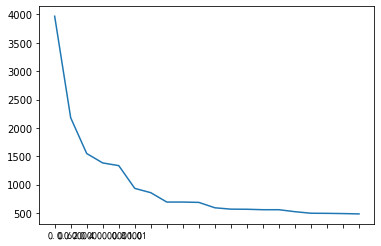

In [205]:
from matplotlib.pyplot import gca
a = gca()
fontProperties = {'fontname':'SimHei'}
a.set_xticklabels(a.get_xticks(), fontProperties)
plt.plot(Freq_2010['Word'], Freq_2010['Count'])

In [203]:
plt.figure()
plt.set_xticklabels(a.get_xticks(), fontProperties)
plt.plot(Freq_2010['Word'], Freq_2010['Count'],fontproperties = ChineseFont1)

AttributeError: module 'matplotlib.pyplot' has no attribute 'set_xticklabels'

<Figure size 432x288 with 0 Axes>

AttributeError: 'Line2D' object has no property 'fontproperties'

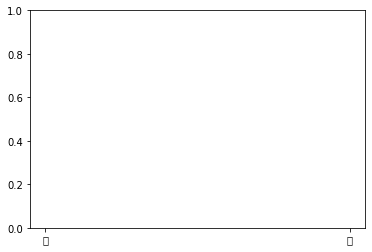

In [198]:
Freq_2010 = Freq_2010.head(20)
hfont = {'fontname':'SimHei'}
plt.plot(Freq_2010['Word'], Freq_2010['Count'],fontproperties = ChineseFont1)

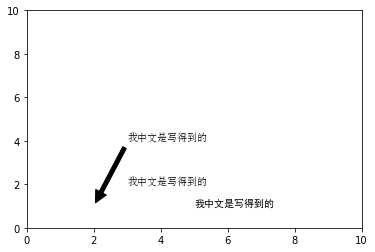

In [197]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
fig = plt.figure()
ax = fig.add_subplot(111)
ChineseFont1 = FontProperties(fname = 'C:\\Windows\\Fonts\\simsun.ttc')
ChineseFont2 = FontProperties('SimHei')
ax.text(3, 2, u'我中文是写得到的', fontproperties = ChineseFont1)
ax.text(5, 1, u'我中文是写得到的', fontproperties = ChineseFont2)
ax.annotate(u'我中文是写得到的', xy=(2, 1), xytext=(3, 4),
            arrowprops=dict(facecolor='black', shrink=0.05),
            fontproperties = ChineseFont1)
ax.axis([0, 10, 0, 10])
plt.show()

In [161]:
data2012 = data.loc[data['Year'] == 2012]
cut_posts_wout_stopwords_2012 = []
for a in data2012['Cutted Posts Without Stopwords']:
    a = a.split()
    cut_posts_wout_stopwords_2012 += a

Freq_2012 = dict(Counter(cut_posts_wout_stopwords_2012))
Freq_2012 = {k: v for k, v in sorted(Freq_2012.items(), key=lambda item: item[1])}

In [173]:
data2012 = data.loc[data['Year'] == 2012]
cut_posts_wout_stopwords_2012 = []
for a in data2012['Cutted Posts Without Stopwords']:
    a = a.split()
    cut_posts_wout_stopwords_2012 += a

Freq_2012 = dict(Counter(cut_posts_wout_stopwords_2012))
words=[]
count=[]
for k, v in sorted(Freq_2012.items(), key=lambda item: item[1]):
        words.append(k)
        count.append(v)
words.reverse()
count.reverse()
Freq_2012 = {}
Freq_2012['Word'] = words
Freq_2012['Count'] = count
Freq_2012 = pd.DataFrame(Freq_2012) 

In [177]:
Freq_2012.head(20)

Word  Count
0     居   3967
1     样   2178
2     不   1548
3     人   1382
4    结婚   1335
5     没    934
6     …    858
7     都    693
8    男人    693
9     ~    687
10    好    592
11    说    568
12    看    566
13    去    558
14    钱    558
15   女人    523
16    很    496
17    后    494
18    年    490
19   生活    484

In [111]:
Freq_2012.sort_values(1, ascending=False, inplace=True)
Freq_2012[:100]

AttributeError: 'dict' object has no attribute 'sort_values'

In [51]:
Cat1 = data.loc[data['kmeans_predictions'] == 1]
Cat1

Posts      User Names  \
2      :不论东西多少，只要是搬家都是大工程啊。我跟同居者聊天，打算在家里放一块匾，上书“弱智儿童欢...              小壹   
4                                    :@claireg 同居也是一种选择。            阿力克狮   
7      :《蜗居》——有个地方不解的是，海藻和宋思明发生关系难道是海藻的第一次？可之前海藻和小贝就同...           橘子Dan   
8      :对《人间失格》深深产生了共鸣，就了解了一下作者，太宰治因为同居女友不是处女而携女友自杀…爱...            飞天凡草   
10             :我的#新年愿望#：1、早发sci早轻松；2、早找工作早哈皮；3、早找房子早同居。          vintae   
12               :大学生同居的事儿第2季19集 http://sinaurl.cn/haNBi             热水壶   
14                         :身边有些同学在大四分手了。呃，看来同居很容易彼此厌倦嘛？             小姿态   
17     :老一辈人说现在的小孩太幸福了，一出生就享受。不错，城市里的小孩是衣食无忧，奢侈无度，上网成...            赵氏尹言   
19     :貌似很多人还不知道返还网，其实我也不太了解，只是从《大学生同居的事儿》的片头广告看到过，还...            小白有菜   
20     :第七集：#婚姻#与鸟笼的比喻，像极了围城。莫非这编剧也粉过钟书先生的大作？还是文化或生活的...              逝川   
21         :恋爱潜规则，看着怎么那么像“跟空姐同居的日子”?台词还挺好玩的，当然，看着还是有点幼稚？           钱敏_轮回   
23     :十大土：一土利用手机自拍照，二土听Mp3还弦耀，三土笔记本当DVD，四土害怕费油挤公交，五...            张君羊V   
24       :有时候跟艺术青年同居会遇到一些烦恼，比如他们在隔壁用十分奇怪的口音，高声唱着迈克尔杰克逊的歌             晃错-   
25     :(1/2)王学宗2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开...             王学宗   
26     :DVD港台剧《有营煮妇 国语》，播放：http://sinaurl.cn/haoUU ，海...       dvdkankan   
27                 :和旧爱分手后同居惹恼新欢 http://sinaurl.cn/haohB          唐纳德_崔佛   
28     :《15岁女孩半年两度怀孕 19岁男友逃跑》。假如二人能坚持到洞房花烛夜再行男女之事，那么发...           文侠罗竖一   
29     :DVD剧情片《血之芬芳》，播放：http://sinaurl.cn/haSTn ，海报：h...       dvdkankan   
30     :(1/2)2010年中国十大热点猜想：一，高房价问题引起国民大辩论；二，生活必需品开始发生...             王学宗   
31     :宿舍里这帮乌烟瘴气的家伙，时常幼稚可笑，庸俗无趣，与其同居一室，更时常悲从中来！但已比在一...            转水转山   
32     :我天天念叨着同屋最害怕的问题 我说把她分到鄂尔多斯分行了 哈哈~ 我俩这14天的＂同居＂生...          JoryaV   
33        :很反感几月几号电影同居 他也认同引入一天 人体育人员让头发也会让他会有反弹后有人太阳人同意         刘小敏_172   
34     :刚才听到一评论大陆台湾关系的精典言论：台湾只想和大陆同居不要结婚！强啊！在电视上拿非正常男...       redpaopao   
38     :裸婚:不买房、不买车、不办婚礼、不买婚戒、不度蜜月，只与双方家长见面即可。其实很多人一直都...        胡赳赳_赳赳说字   
40     :堵车问题是北京产生大量剩男剩女的主要原因。据调查，北京恋人为了见一面吃个饭，耗费在路上的时...             葬花舞   
41     :网友把《蜗居》PK《奋斗》得出的结论：奋斗讲了几对年轻无知的男女的混乱爱情故事，主讲‘情’...            浩歌微语   
42            :一周同居三次 许慧欣郭品超热恋曝光 http://sinaurl.cn/hajf7      小丸子_GOGOGO   
43                   :日本女性不再蜗居愿同居http://sinaurl.cn/haRE4          ZJ同学同学   
44                :周迅被曝与阔少王朔同居怀孕 http://sinaurl.cn/han5D           看我就吻你   
46      :日本女性不再蜗居愿同居：http://sinaurl.cn/haRE4 合租在日本尚属新鲜事物             美剧迷   
...                                                  ...             ...   
18294  :看到微信运动推送，说我今天走了8888步，就很惊喜，这么吉利的数字，结果打开排行榜一看，发...         何吟Helen   
18296  :#同居人是猫##和汤圆的日常#\n今天追了同居人是猫\n真的好感动 平淡的故事但是好几次泪...          咱们都会发亮   
18297                             :刘诗诗现身公寓门口与吴奇隆前后脚出现疑同居         可可柔媚小女人   
18298                          :白天做夫妻，晚上做邻居，同居不同心，搭伙过日子。          霖哥是我小妞   
18304  :孟美岐你死不死？来看看恶臭孟美岐粉张口造谣，哪一个队友粉没被他们空口造谣过孟美岐滚出娱乐圈...            圈内神评   
18305  :耶和华的律法全备，能苏醒人心；耶和华的法度确定，能使愚人有智慧。(诗篇 19:7 和合本)...        Penny潘大妮   
18307  :同居后才发现原来他是这种人…#快手小剧场 #二次元 #爱情 @快手小剧场#记录世界 记录你...       阳光海滩54887   
18308  :#和许老师同居了么# 还没有昂 图一和丁哥的唠嗑，图二许大军看我和丁哥唠嗑的repo哈哈哈...         许老师的牛哥哥   
18309       :同居（試婚）\n\n以前覺得不重要，現在後悔也來不及了，原來我們的生活一直那麼不一樣！            微醺雪茄   
18311  :你今天回和前任同居的房子了\n希望你能好好休息放松\n中外友谊长存\n你的作品集里面有用他...        内在腐烂_444   
18312                                    :同居的你@可乐少女__ 北京         jjjanat   
18313                                             :合法同居人          静静ed时光   
18315     :等我毕业了我要写本书 书名就叫如何在精神病舍友的压迫下搞科研 或者叫与三百万债主的同居生活        敲代码的石原里美   
18317                               :感觉全世界的人都在同居 只有我还在异国       甜蜜饯errrrr   
18318                                         :想和成熟的女性同居             亖w亖   
18319                                     :#同居后最容易闹矛盾的点#            割白菜的   
18320  :#赵丽颖男装# 张翰想和赵丽颖同居，一天也等不了，颖宝脸红咯！\n封腾想和杉同居，一天也等...          知名综艺小弟   
18323  :发布了头条文章：《孙俪和他同居多年却分手，邓超不愿与他同台，今36岁却活成这样！》 孙俪和...         英超班的体育生   
18324  :猫传染性腹膜炎是感染猫冠状病毒而引起的疾病，传染率非常高。一般认为是经口鼻感染。病毒携带猫...            大菊很重   
18326  :#peewee日常##peewee近期的精神文明建设#\n北京最喜欢的季节\n和我卷妹同居...          Peewee   
18329        :发布了头条文章：《婚姻手记之婚前同居篇》 您身边的私人法律顾问 婚姻手记之婚前同居篇           律法人生1   
18330  :#同居后最容易闹矛盾的点##情

Below are the number of posts each year and a reculculation of different topic throughout years divided by posts per year

In [137]:
a = data.loc[data['Year'] == 2010]
a.shape

(5848, 15)

In [138]:
b = data.loc[data['Year'] == 2012]
b.shape

(4225, 15)

In [139]:
c = data.loc[data['Year'] == 2016]
c.shape

(3421, 15)

In [140]:
d = data.loc[data['Year'] == 2019]
d.shape

(4851, 15)

In [151]:
size.iloc[0] = size.iloc[0] /5848
size.iloc[1] = size.iloc[1]/4225
size.iloc[2] = size.iloc[2]/3421
size.iloc[3] = size.iloc[3]/4851

In [152]:
size

0         1         2         3         4         5         6  \
2010  0.011115  0.557285  0.000000  0.036252  0.007524  0.110123  0.045657   
2012  0.010178  0.602840  0.004734  0.006391  0.042130  0.031243  0.050178   
2016  0.031862  0.657702  0.009939  0.001462  0.014616  0.018708  0.050570   
2019  0.057514  0.576582  0.021851  0.000000  0.005772  0.004947  0.057926   

             7         8         9  
2010  0.224521  0.003933  0.003591  
2012  0.207574  0.027692  0.017041  
2016  0.203742  0.000877  0.010523  
2019  0.274583  0.000618  0.000206

In [155]:
size = size.rename(columns={0: 'Romantic Love', 1: "General",
                  2: 'Copypasted', 3: "Tradition1",
                  4: 'Tradition2', 5: 'Weird Novel',
                  6: 'Cohabitation Postive', 7: "Cohabitation vs. Marriage",
                  8: 'Copy-pasted', 9: "New Value",})
new_size =  size.drop(['Copypasted','General','Copy-pasted'],axis = 1)
new_size

Romantic Love  Tradition1  Tradition2  Weird Novel  \
2010       0.011115    0.036252    0.007524     0.110123   
2012       0.010178    0.006391    0.042130     0.031243   
2016       0.031862    0.001462    0.014616     0.018708   
2019       0.057514    0.000000    0.005772     0.004947   

      Cohabitation Postive  Cohabitation vs. Marriage  New Value  
2010              0.045657                   0.224521   0.003591  
2012              0.050178                   0.207574   0.017041  
2016              0.050570                   0.203742   0.010523  
2019              0.057926                   0.274583   0.000206

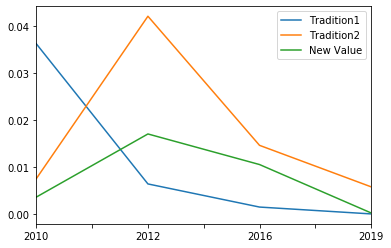

In [156]:
ax = plt.gca()
size.plot(kind='line',y='Tradition1',ax=ax)
size.plot(kind='line',y='Tradition2',ax=ax)
size.plot(kind='line',y='New Value',ax=ax)

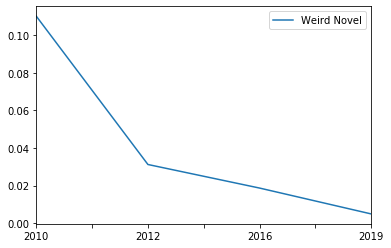

In [157]:
ax = plt.gca()
size.plot(kind='line',y='Weird Novel',ax=ax)

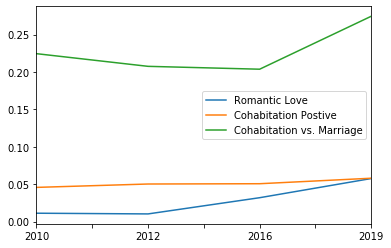

In [158]:
ax = plt.gca()
size.plot(kind='line',y='Romantic Love',ax=ax)
size.plot(kind='line',y='Cohabitation Postive',ax=ax)
size.plot(kind='line',y='Cohabitation vs. Marriage',ax=ax)